# Case study of uniaxial tensile tests

This is an example of how to use Paramaterial to process a dataset of uniaxial tensile test measurements.
The data should be formatted as a set of csv files containing measurements for each test, and a single excel spreadsheet containing the metadata for the dataset.
There should be a single row in the excel spreadsheet for each csv file.

The analysis takes 4 stages:
- Data preparation
- Data processing
- Model fitting
- Test report generation

In [1]:
import importlib
import os
import shutil

from matplotlib import pyplot as plt

import paramaterial as pam

In [2]:
importlib.reload(pam)

<module 'paramaterial' from 'C:\\Users\\DS\\paramaterial\\paramaterial\\__init__.py'>

## Data preparation

### Prepare backup data
Create directories: "data", "info".
First, save all csv files into a directory called "data/00 backup data".
Generate a corresponding info table "info/00 backup info.xlsx" using make_info_table function.
The function writes the table to a spreadsheet and returns it as a dataframe.
Fill in the info and save backup info and data. Copy to raw info and data.

In [3]:
backup_info = pam.preparing.make_info_table('data/00 backup data',
                                            ['test id', 'old filename', 'test type', 'material', 'temperature', 'rate'])
backup_info.head()

test id              old filename test type material temperature rate
0     NaN  P_020_F_1_017_198_18.csv       NaN      NaN         NaN  NaN
1     NaN  P_020_F_2_018_202_19.csv       NaN      NaN         NaN  NaN
2     NaN  P_020_F_3_019_208_25.csv       NaN      NaN         NaN  NaN
3     NaN  P_020_G_1_021_197_16.csv       NaN      NaN         NaN  NaN
4     NaN  P_020_G_2_022_195_24.csv       NaN      NaN         NaN  NaN

Add the metadata and apply a naming convention in the "test id" column.

In [4]:
for i, filename in enumerate(os.listdir('data/00 backup data')):
    test_id = f'testID_{i + 1:03d}'
    test_type, temperature, material = filename.split('_')[0:3]
    rate = 8.66e-4
    backup_info.loc[
        backup_info['old filename'] == filename,
        ['test id', 'test type', 'material', 'temperature', 'rate']
    ] = [test_id, test_type, material, temperature, rate]

backup_info.to_excel('info/00 backup info.xlsx', index=False)
backup_info.head()

test id              old filename test type material temperature  \
0  testID_001  P_020_F_1_017_198_18.csv         P        F         020   
1  testID_002  P_020_F_2_018_202_19.csv         P        F         020   
2  testID_003  P_020_F_3_019_208_25.csv         P        F         020   
3  testID_004  P_020_G_1_021_197_16.csv         P        G         020   
4  testID_005  P_020_G_2_022_195_24.csv         P        G         020   

       rate  
0  0.000866  
1  0.000866  
2  0.000866  
3  0.000866  
4  0.000866

Copy backup data and info into raw data and info, then leave backup alone in all further steps.

In [5]:
old_dir, new_dir = 'data/00 backup data', 'data/01 raw data'
if os.path.isdir(new_dir):  # delete new_dir and files if they already exist
    shutil.rmtree(new_dir)
shutil.copytree(old_dir, new_dir)

shutil.copy('info/00 backup info.xlsx', 'info/01 raw info.xlsx')

'info/01 raw info.xlsx'

### Preparing raw data
Rename files according to test id.

In [6]:
pam.preparing.rename_by_test_id('data/01 raw data', 'info/01 raw info.xlsx')

Renamed 154 files in data/01 raw data.


Check that column headers of data files are all the same.

In [7]:
pam.preparing.check_column_headers('data/01 raw data')

Checking column headers...
First file headers:
	['Strain', 'Stress_MPa']
Headers in all files are the same as in the first file.


### Exploratory data analysis

Now that we have prepared the data, we can use the DataSet class to create a plot of all the raw data.

<AxesSubplot:xlabel='Strain', ylabel='Stress (MPa)'>

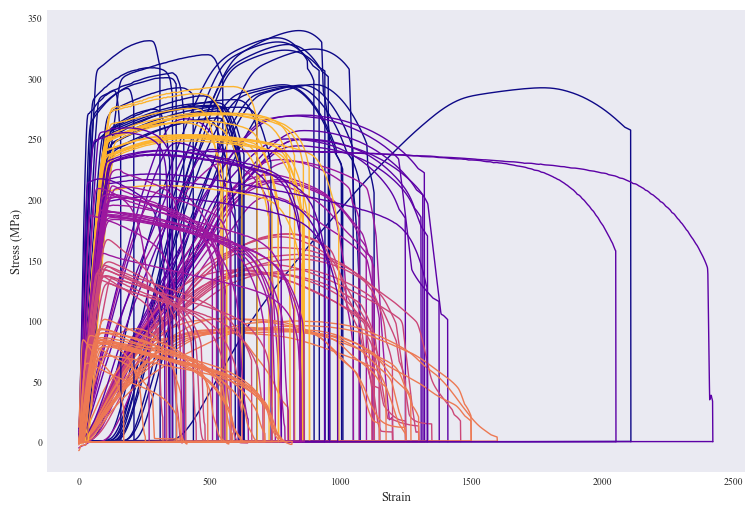

In [11]:
from paramaterial.plug import DataSet

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
raw_dataset = DataSet('data/01 raw data', 'info/01 raw info.xlsx')
raw_dataset.plot(ax=ax, colorby='temperature', x='Strain', y='Stress_MPa', xlabel='Strain', ylabel='Stress (MPa)', legend=False)

We can also plot subsets of the dataset with different styles. Here, we style according to test type.

C:\Users\DS\anaconda3\envs\paramaterial\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:ylabel='Stress (MPa)'>

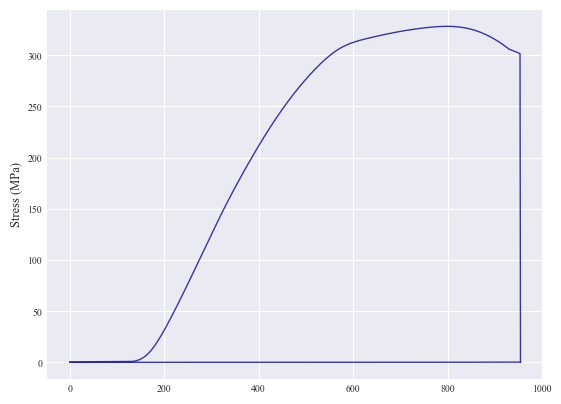

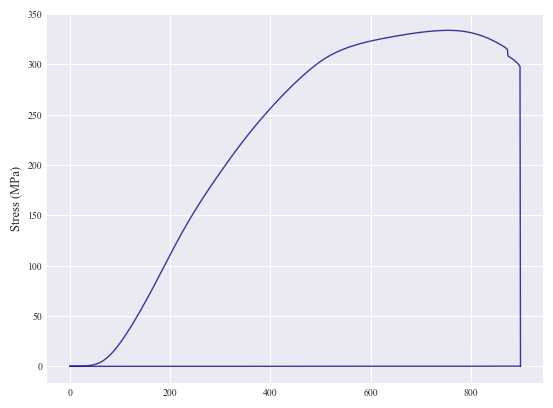

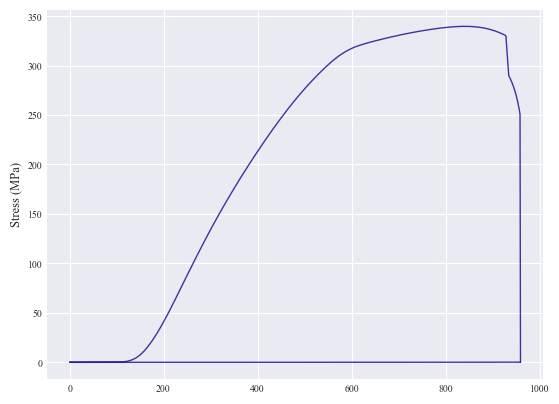

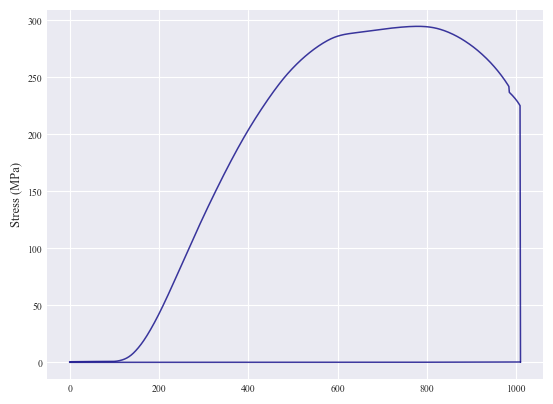

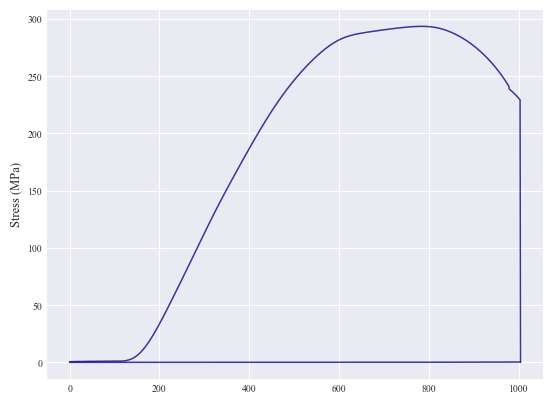

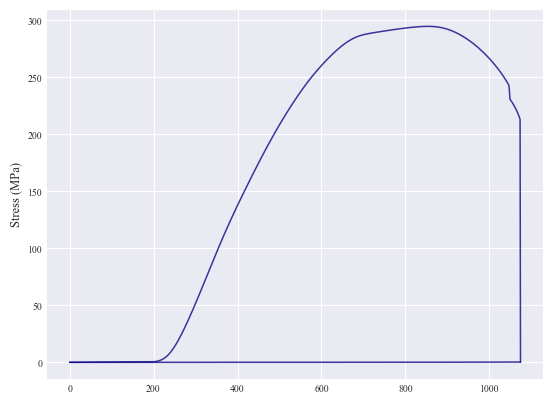

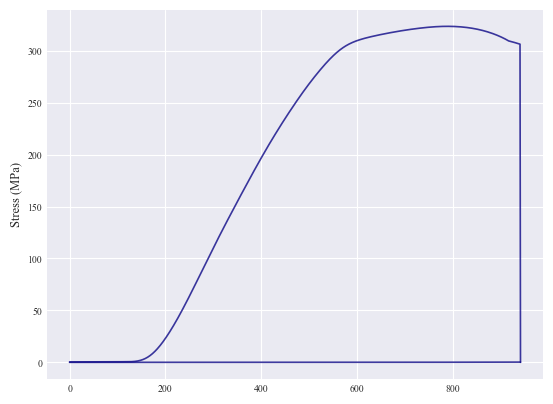

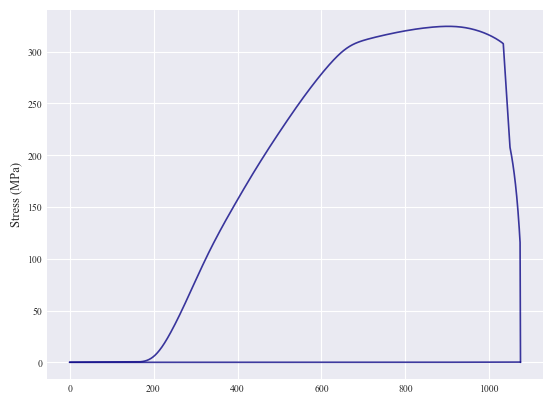

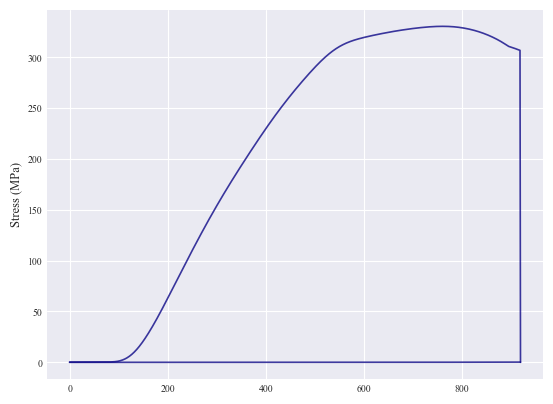

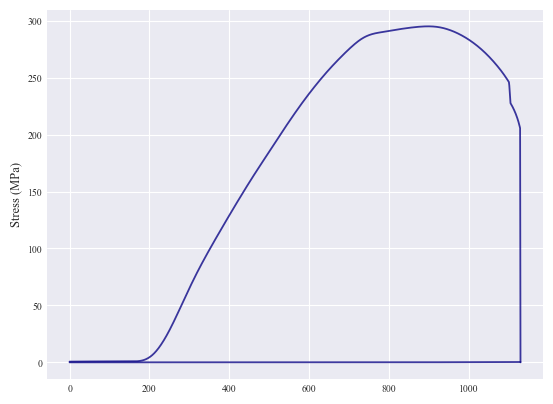

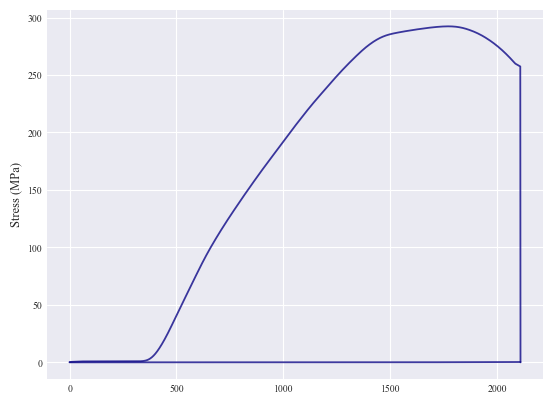

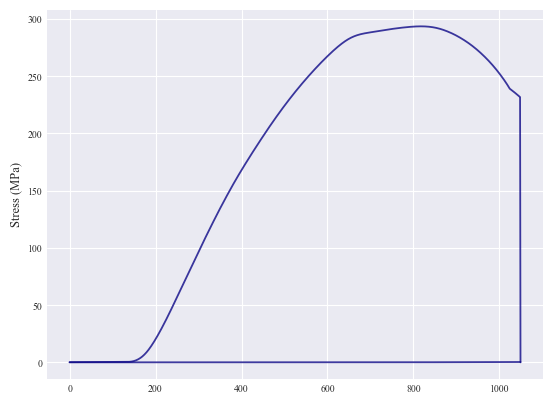

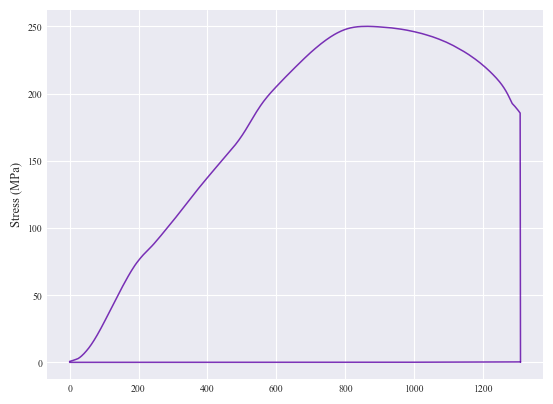

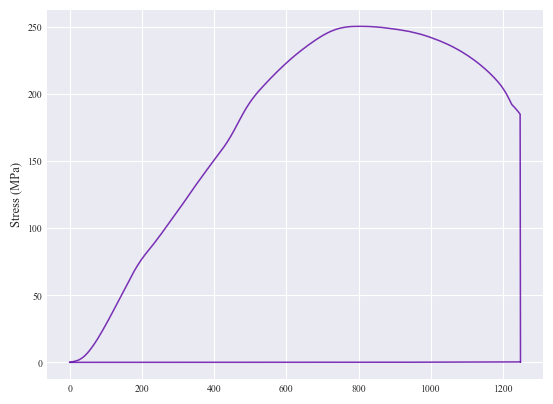

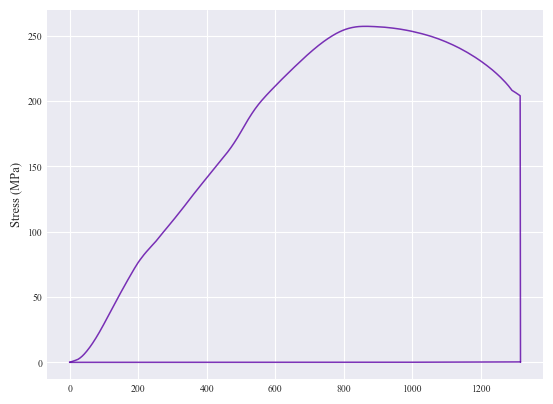

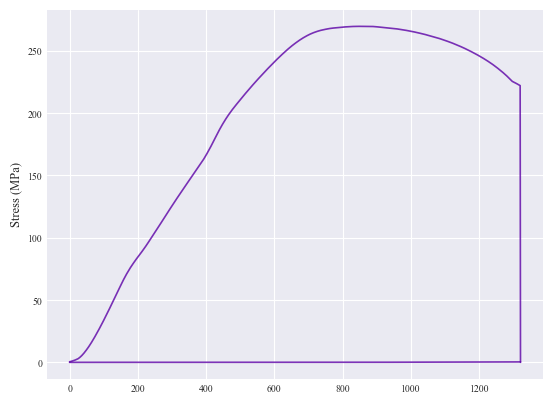

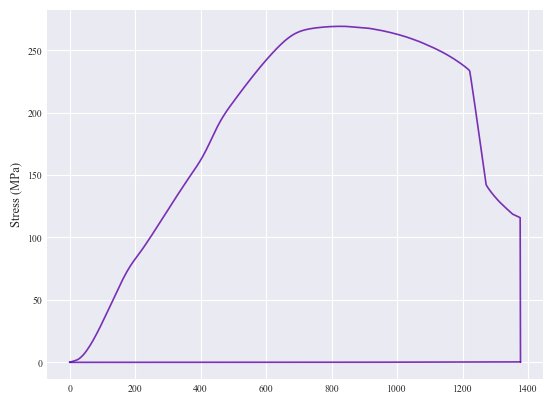

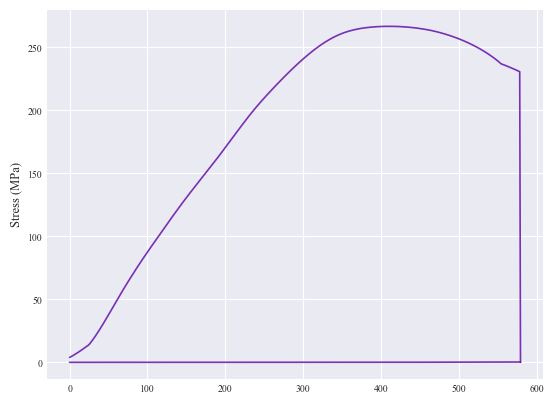

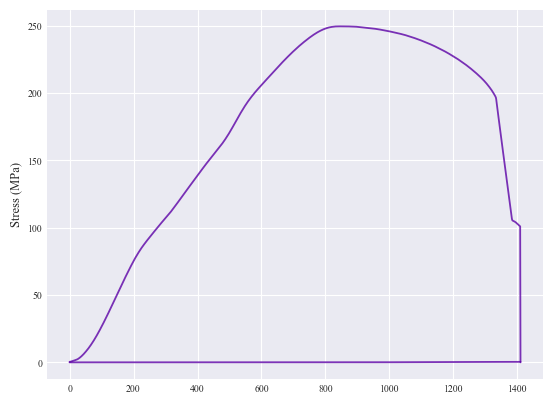

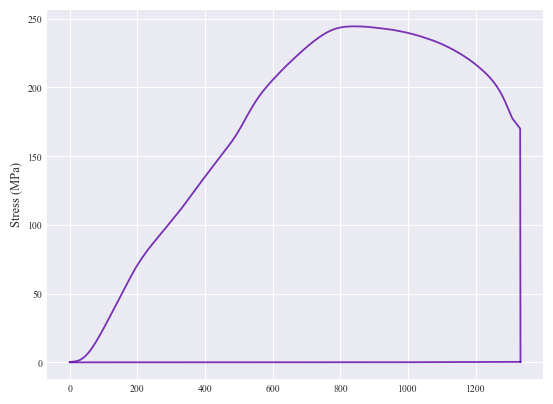

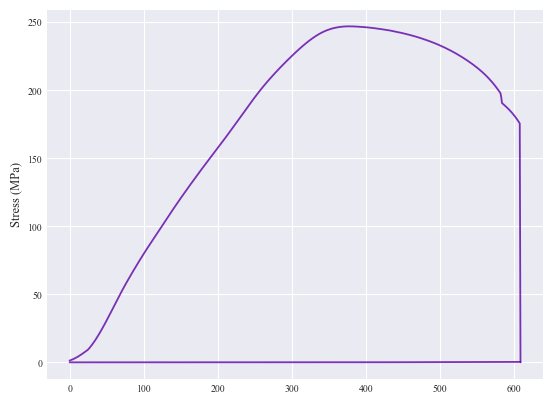

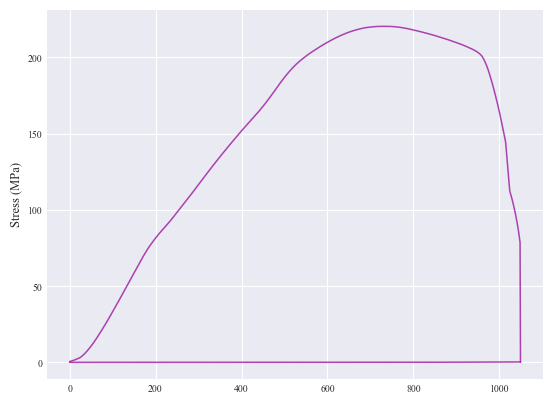

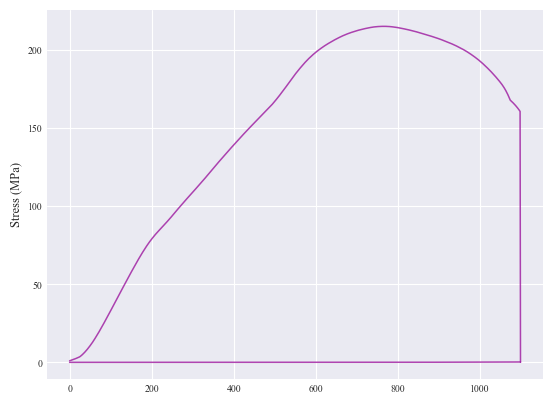

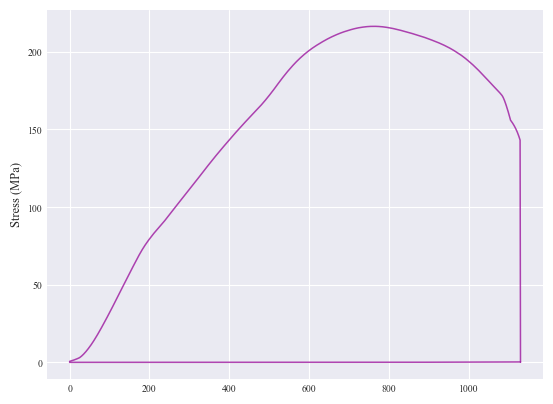

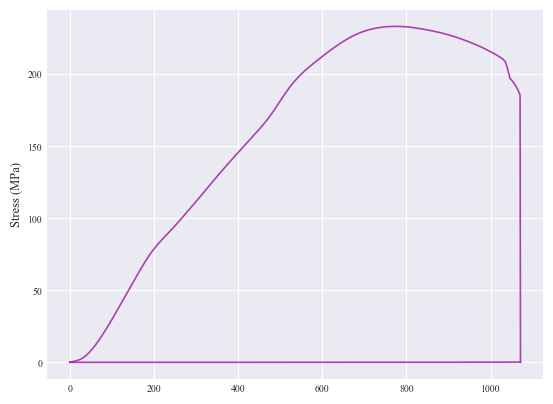

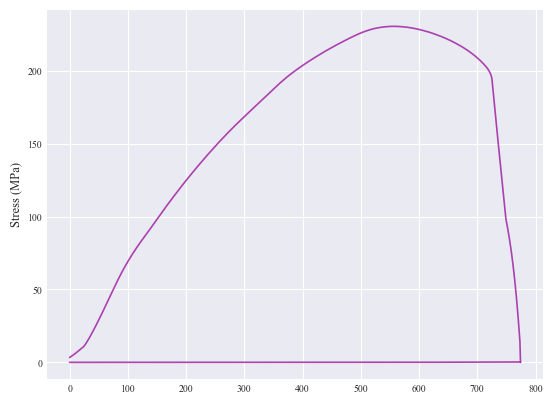

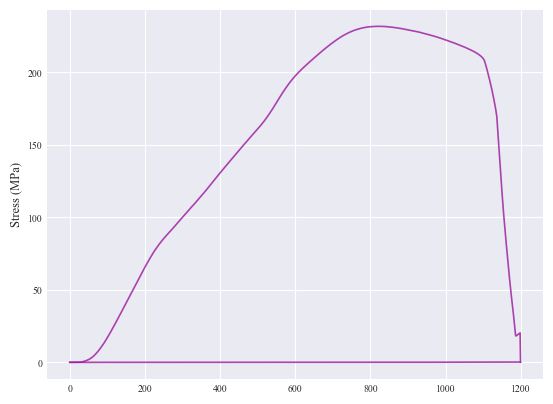

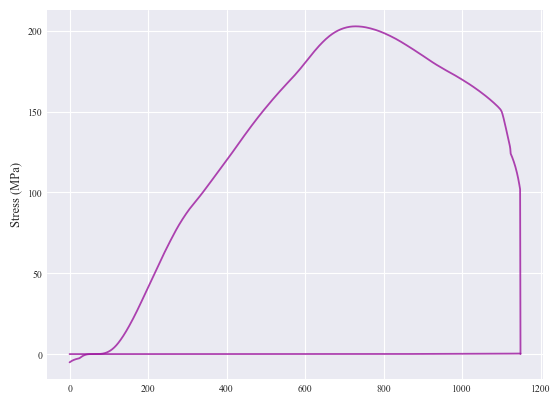

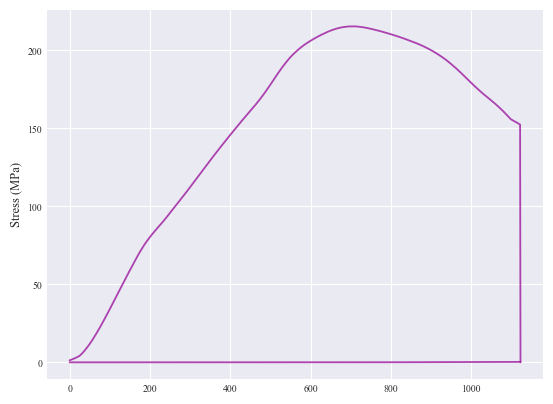

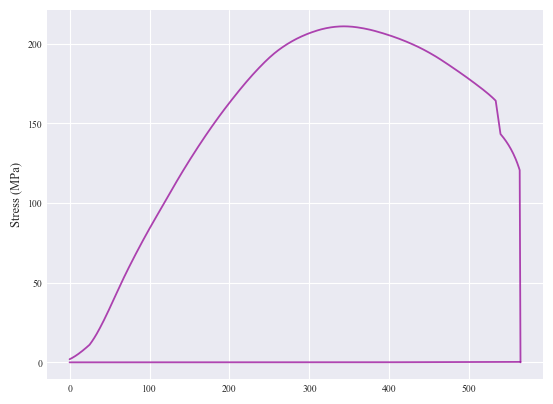

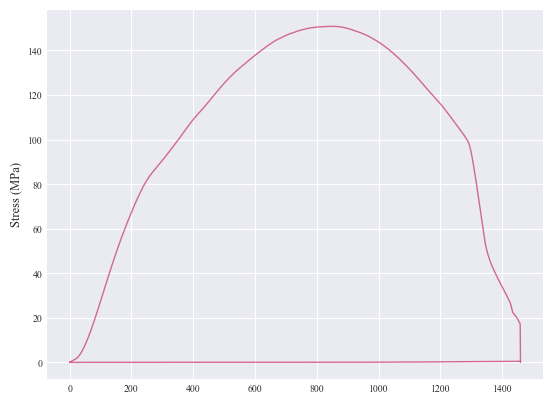

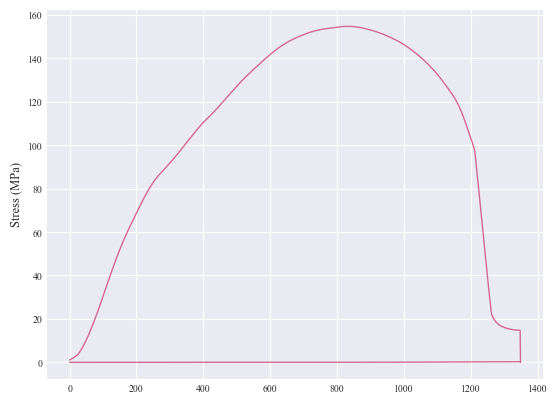

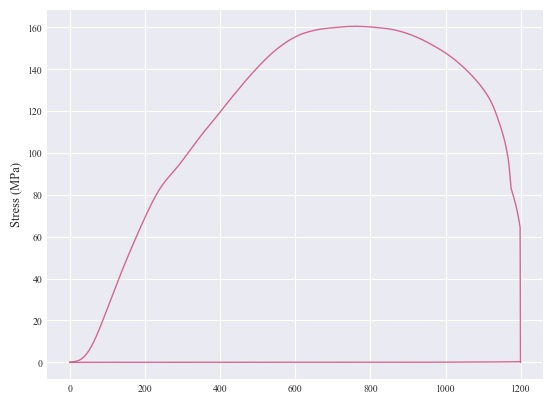

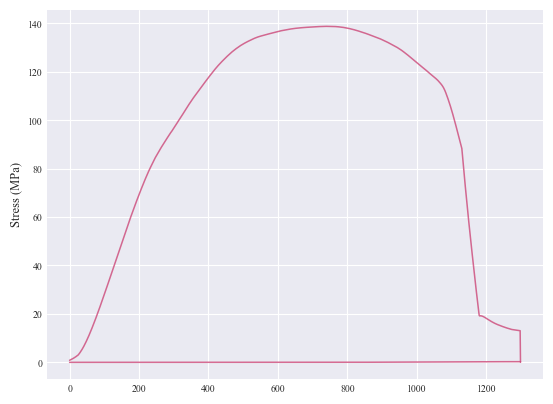

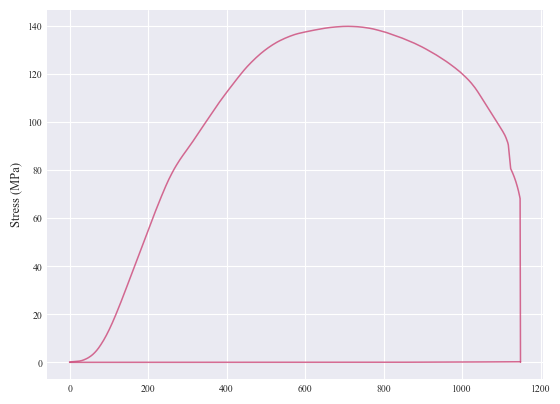

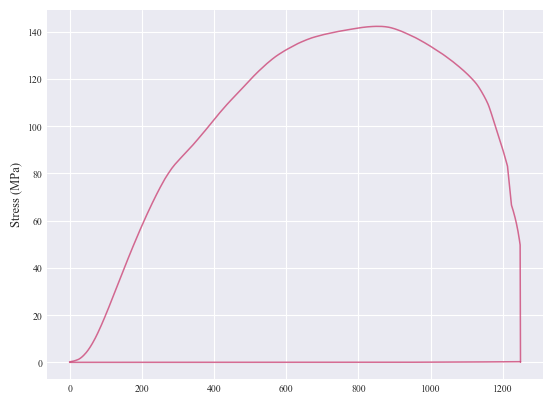

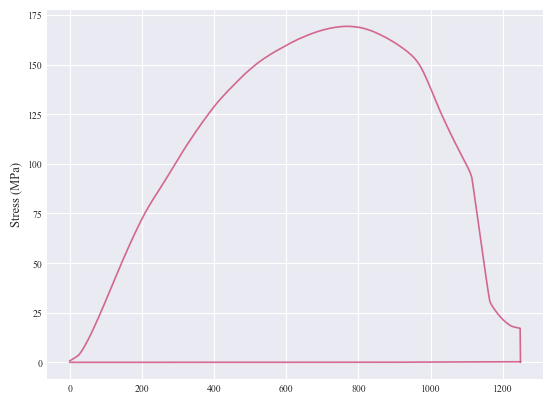

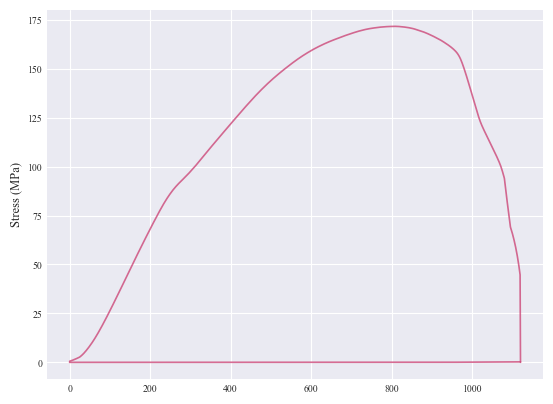

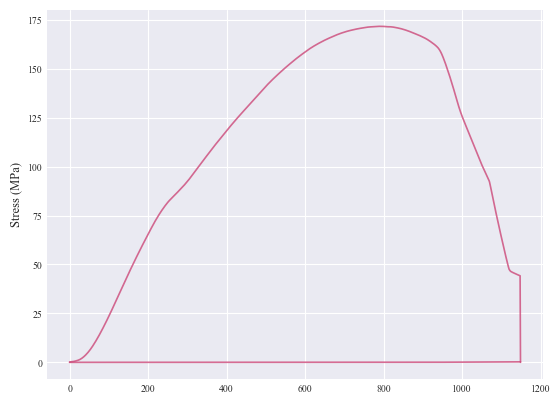

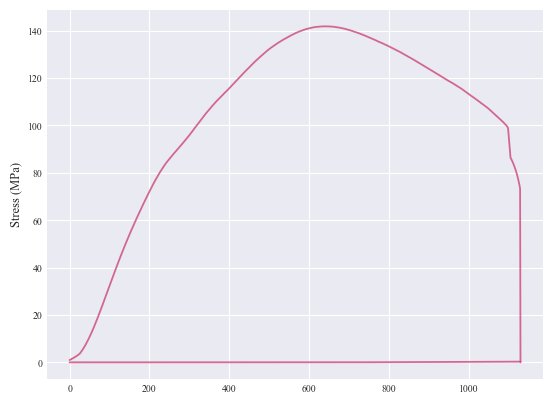

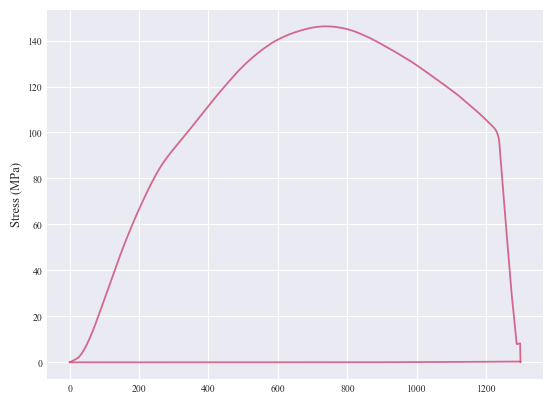

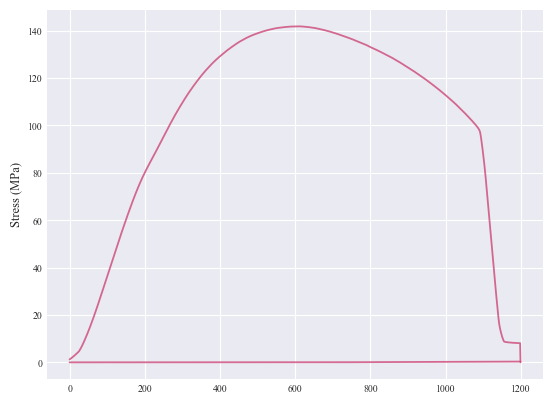

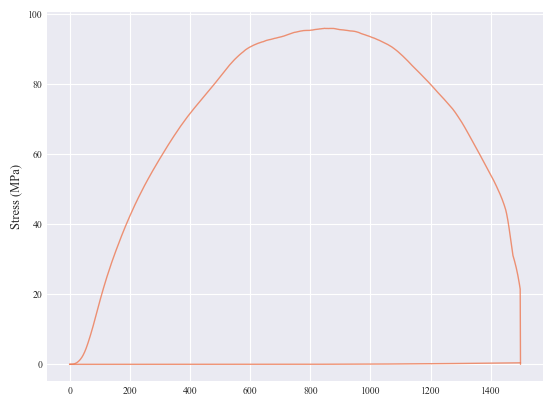

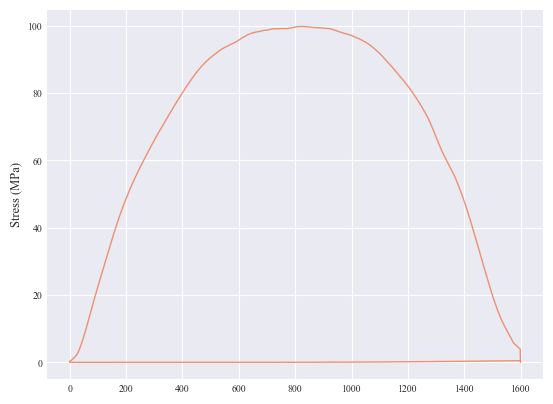

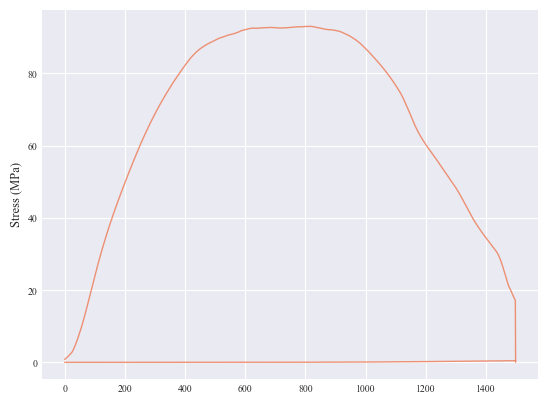

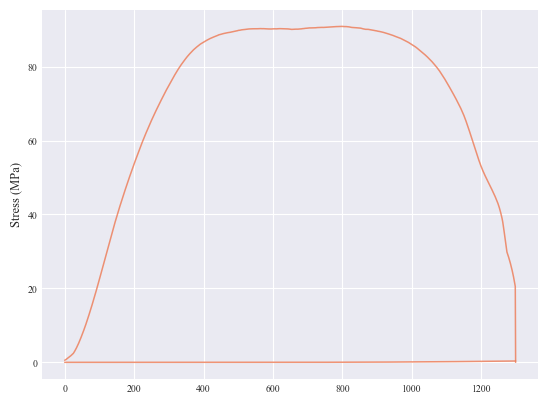

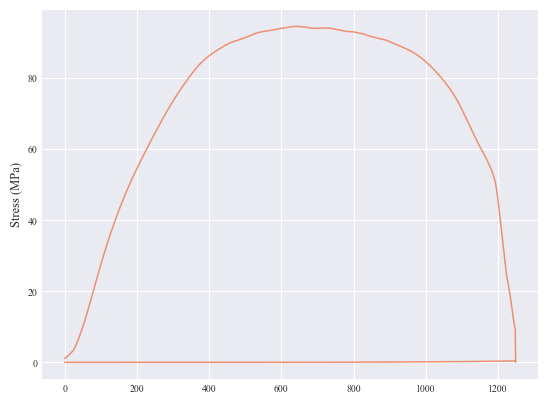

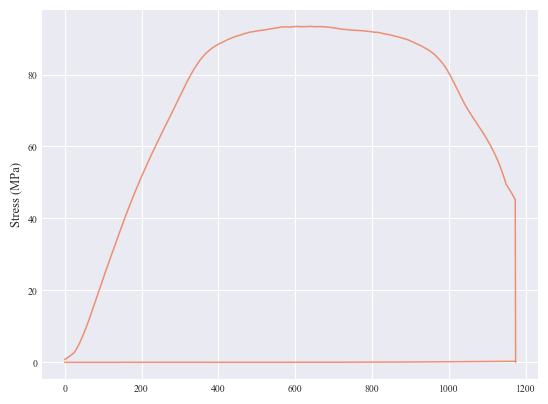

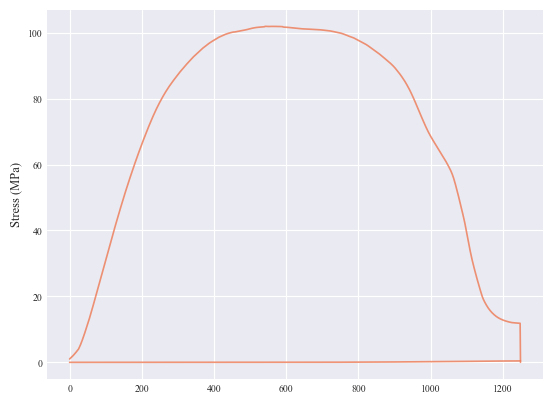

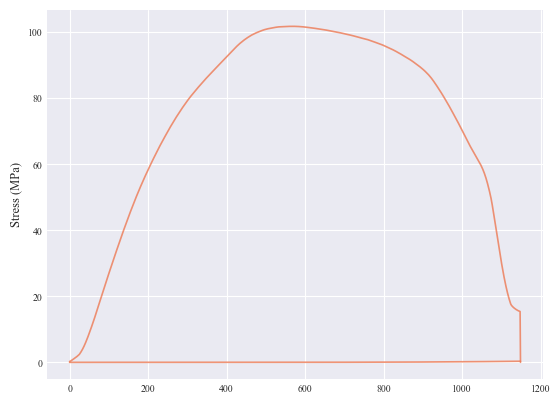

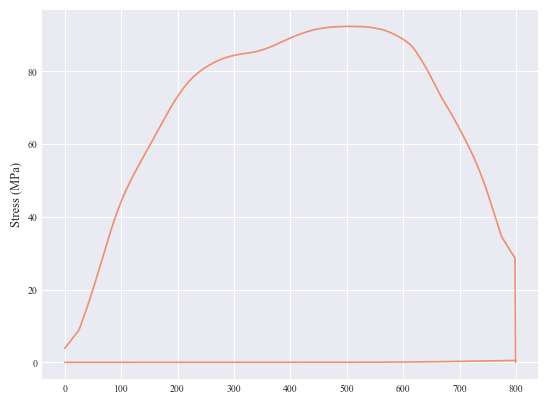

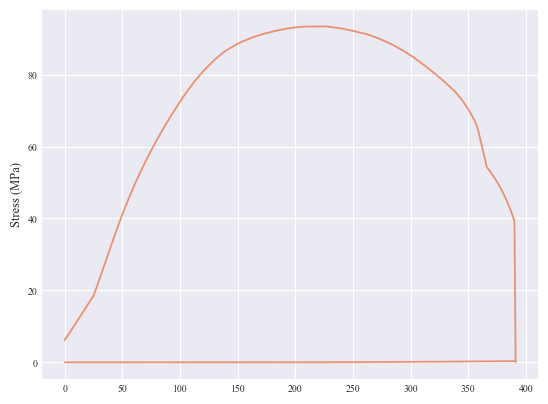

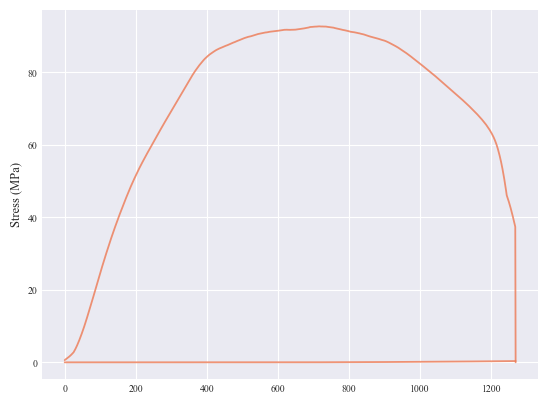

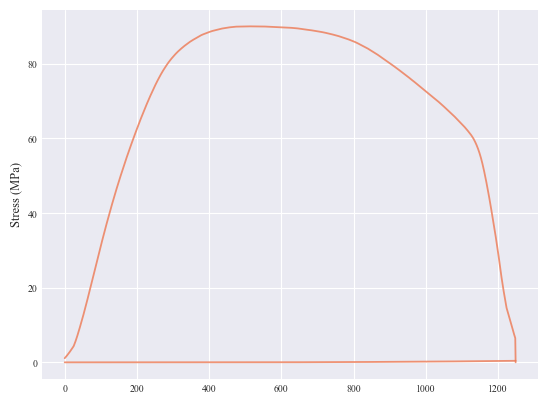

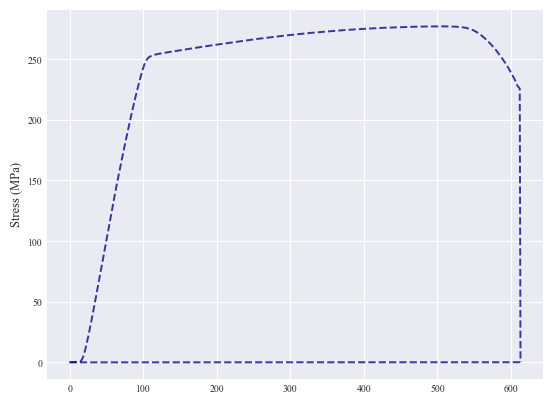

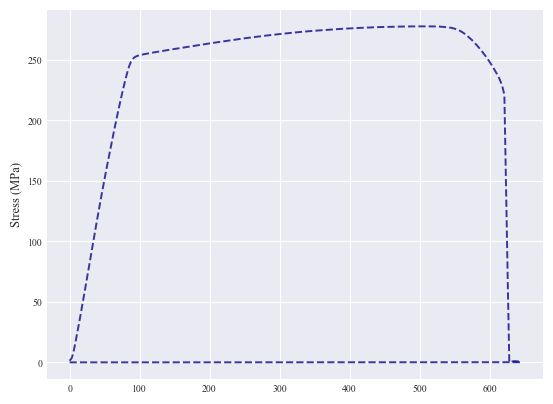

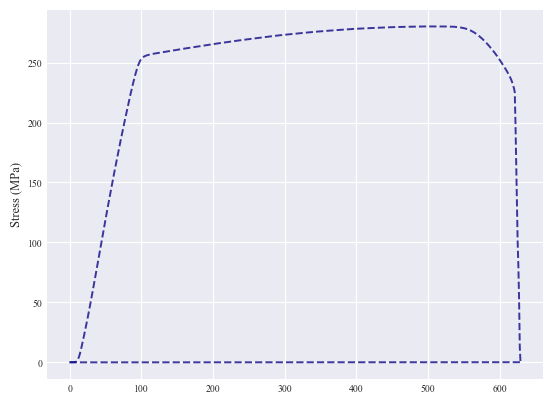

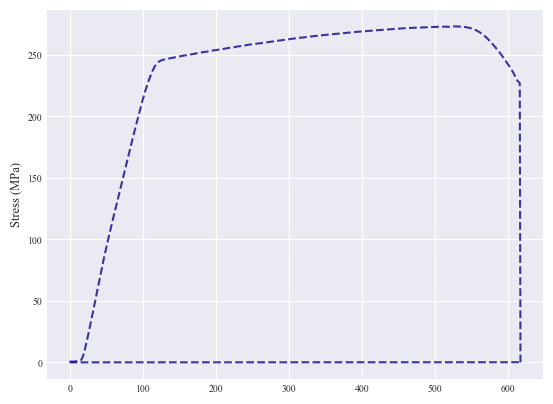

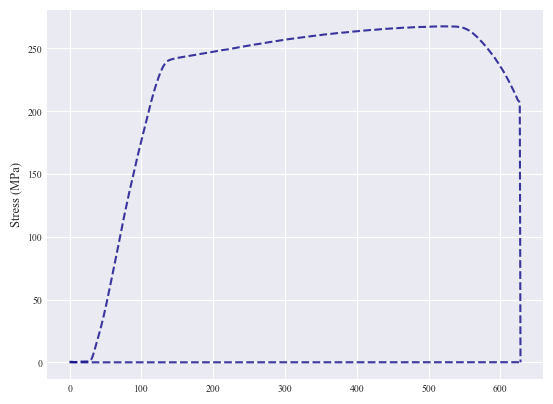

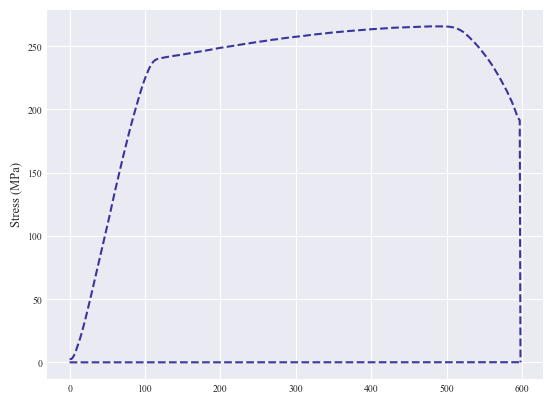

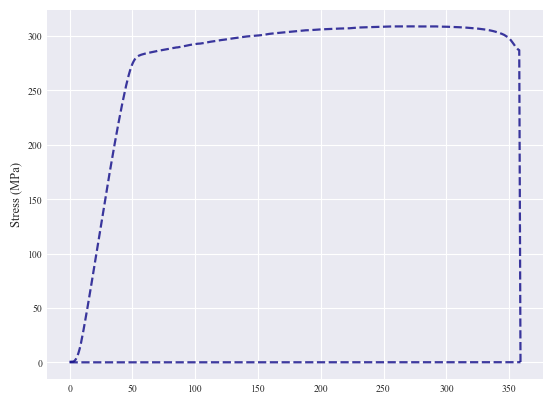

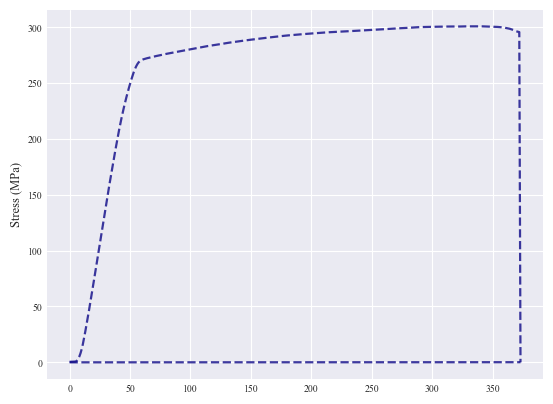

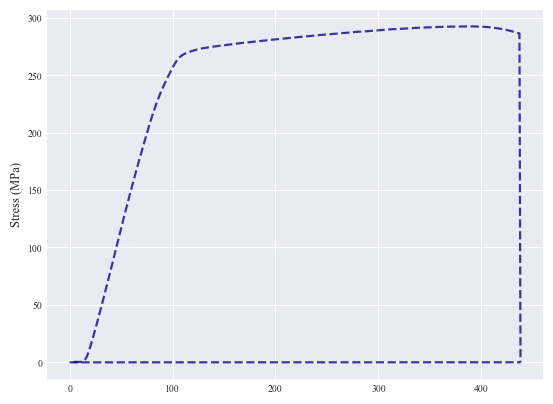

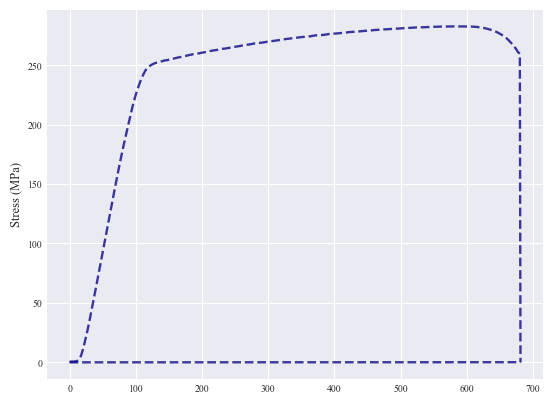

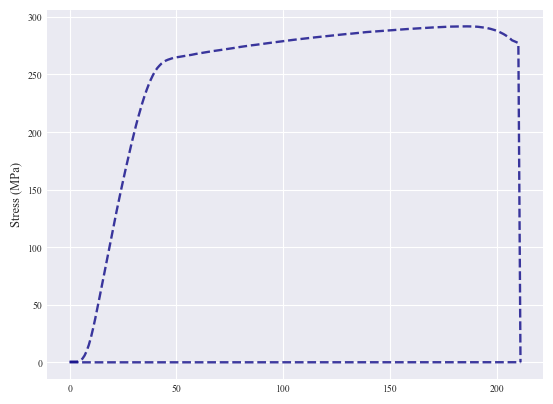

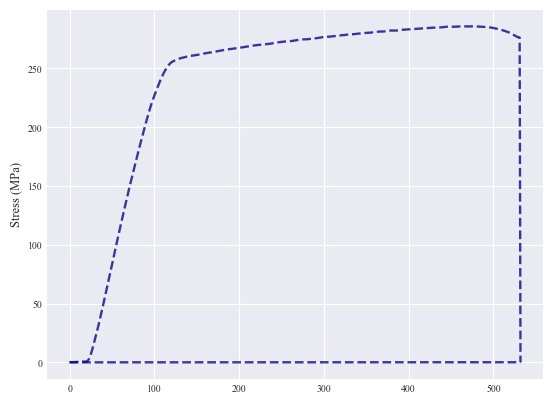

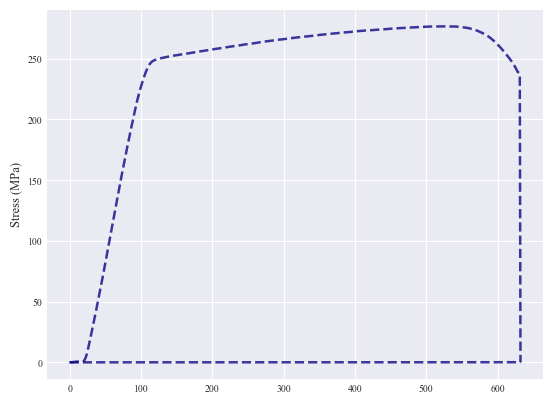

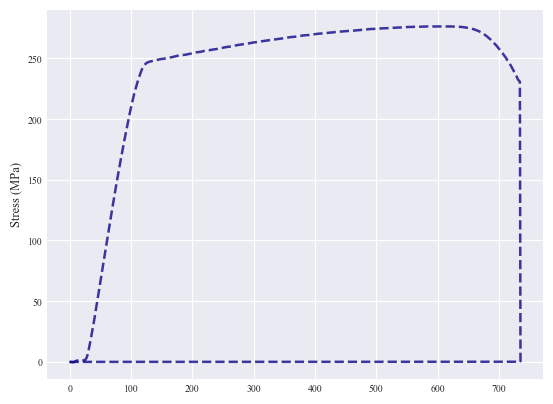

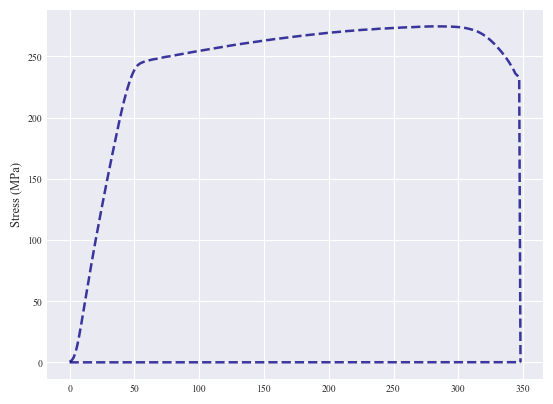

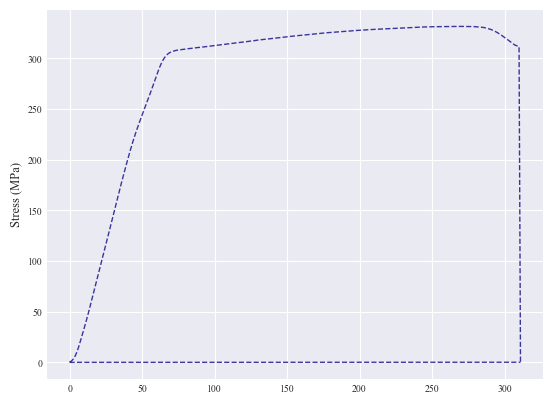

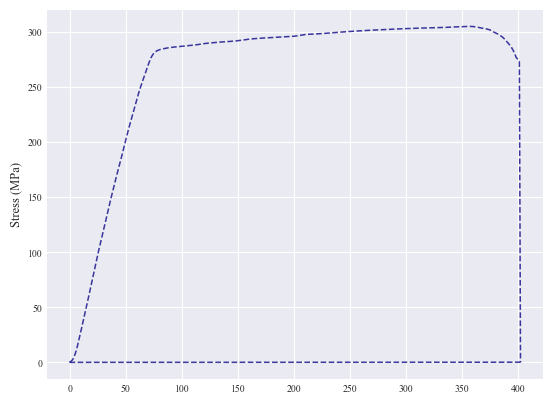

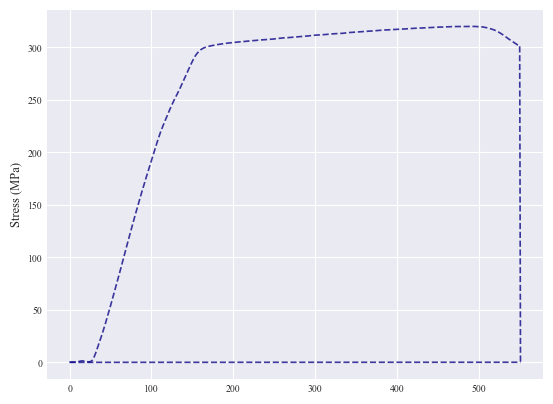

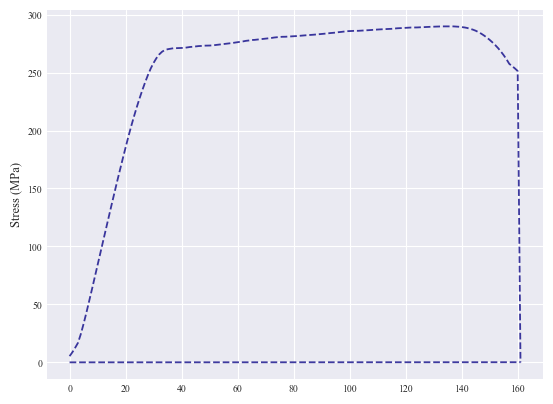

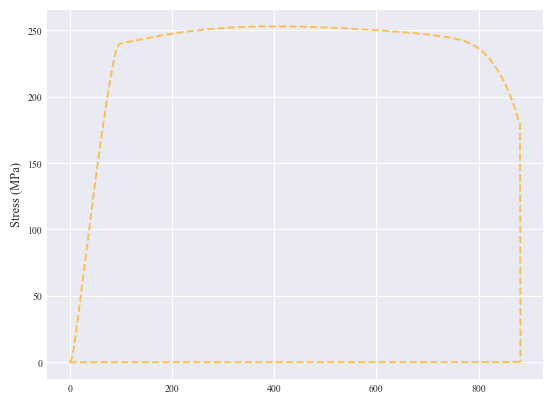

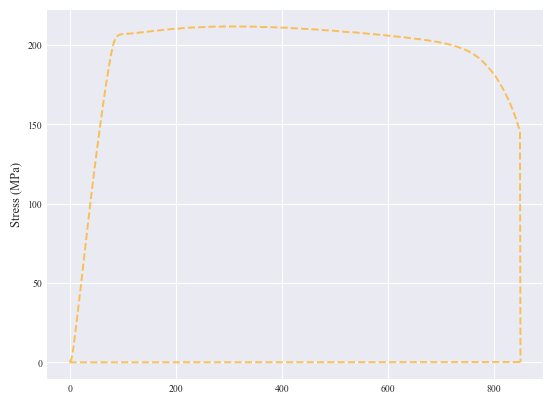

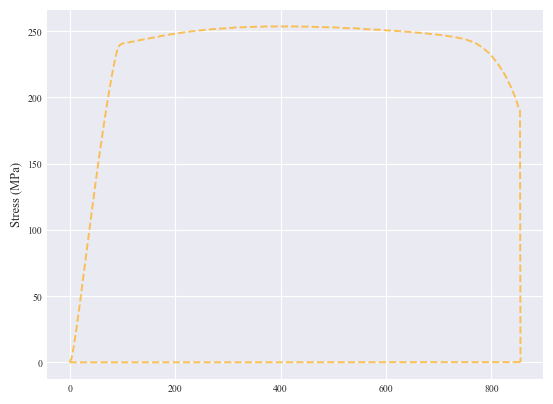

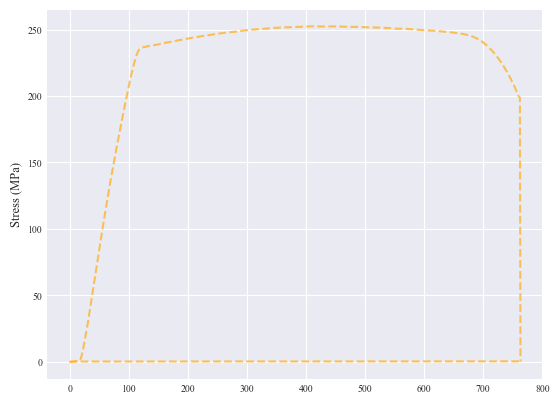

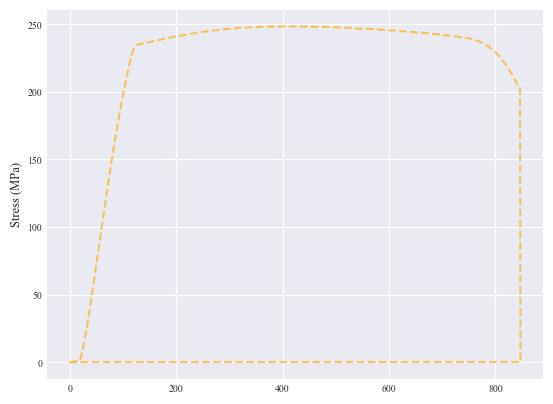

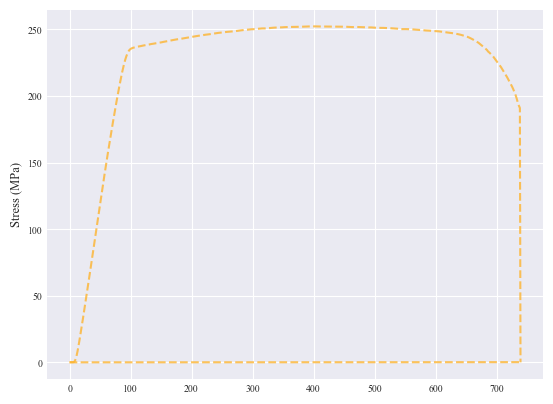

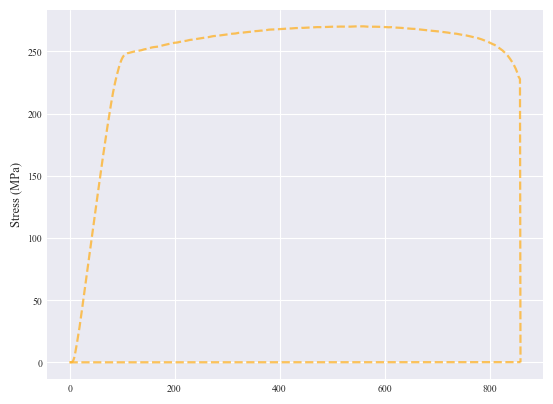

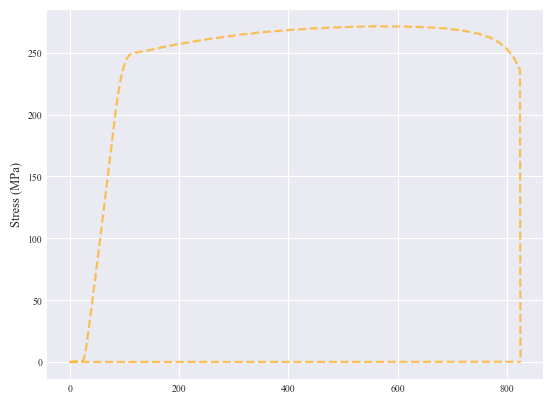

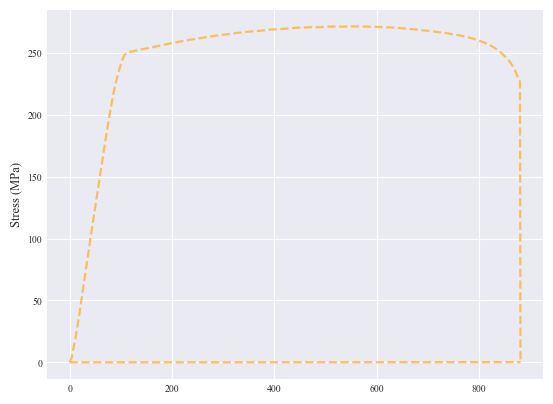

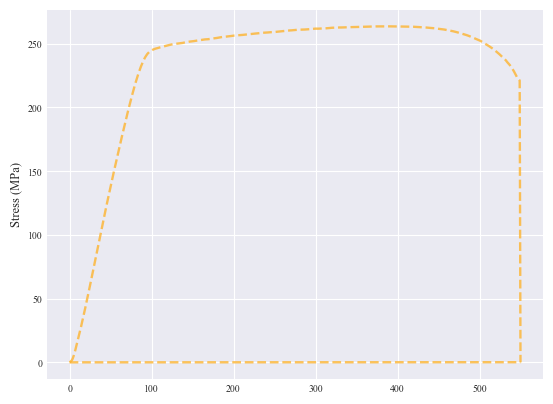

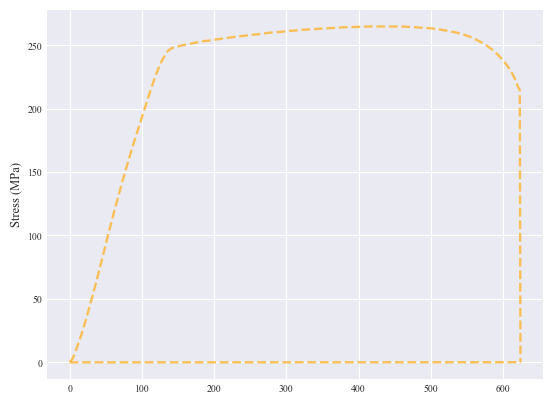

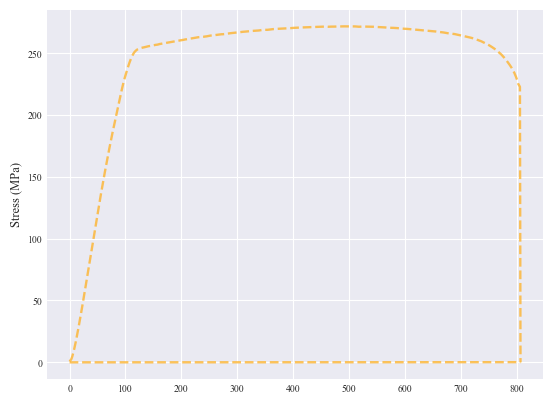

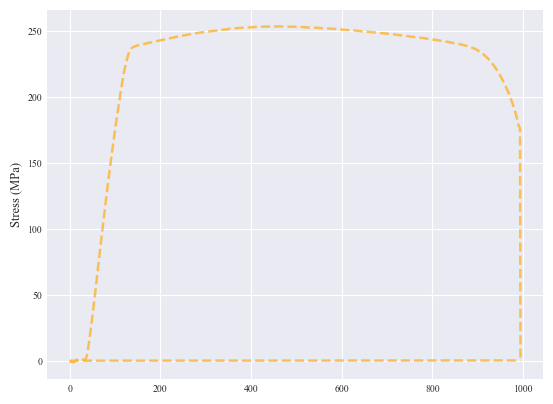

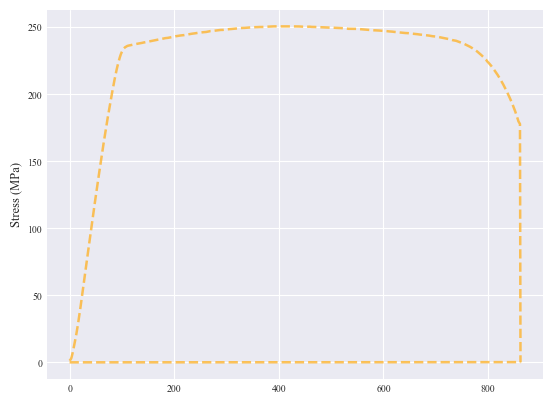

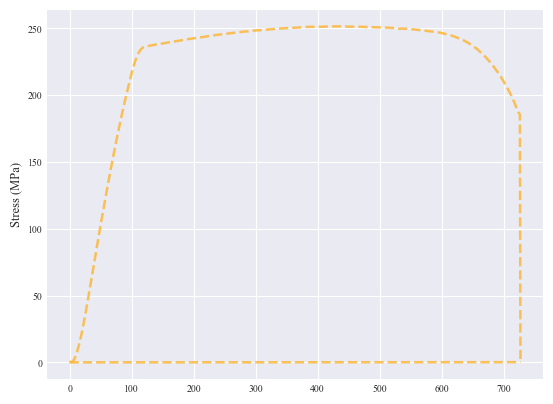

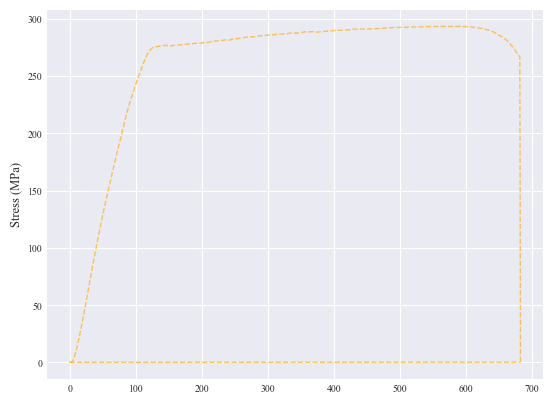

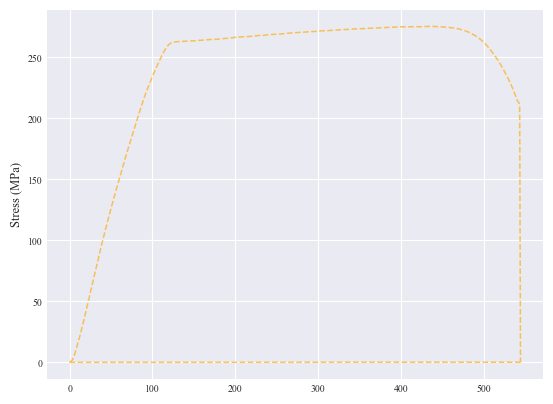

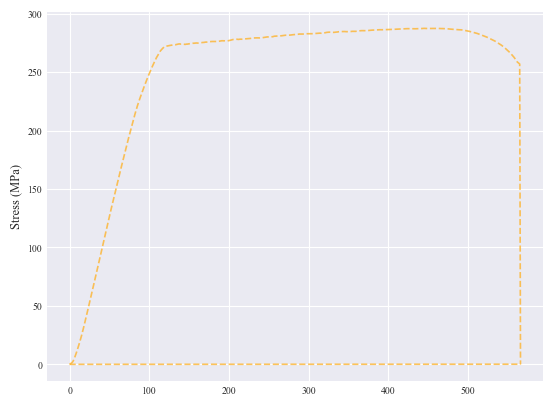

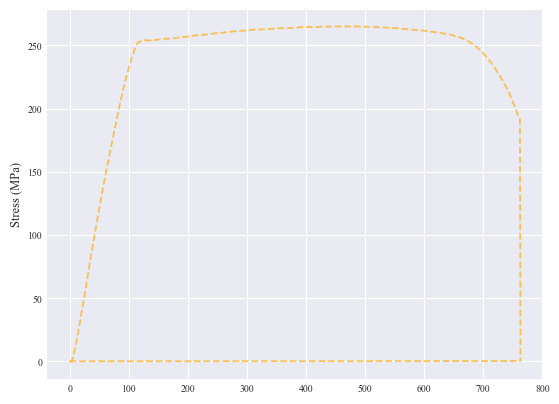

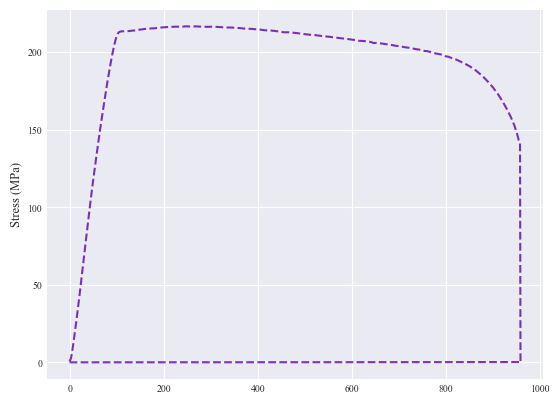

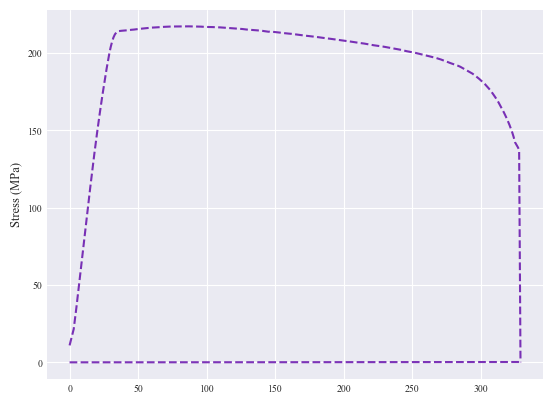

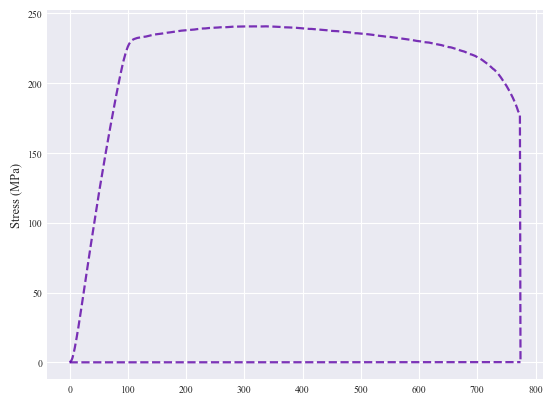

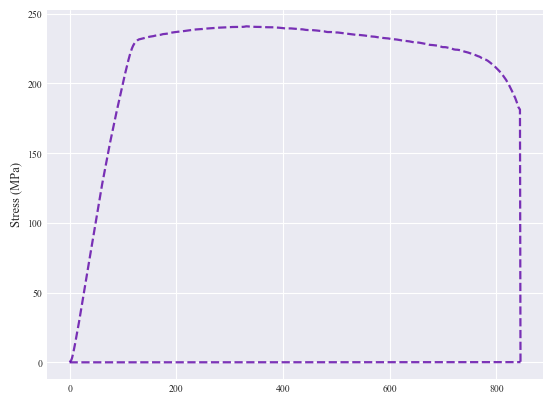

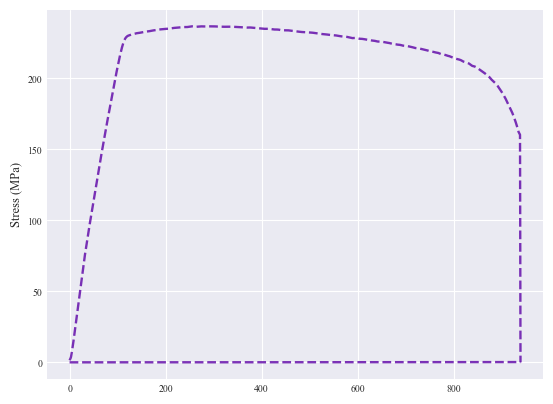

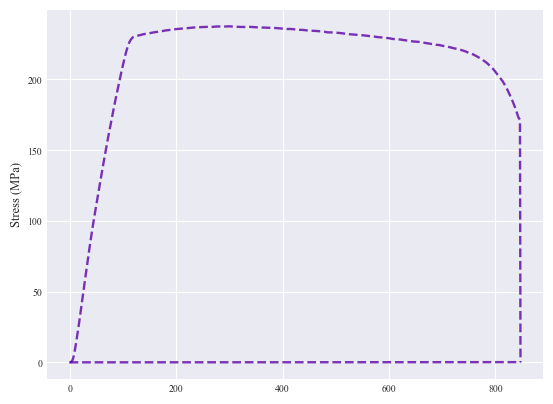

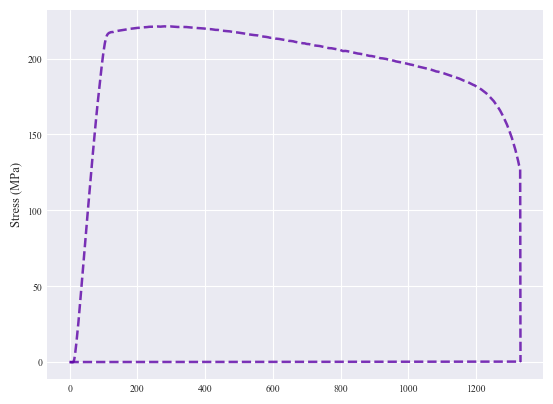

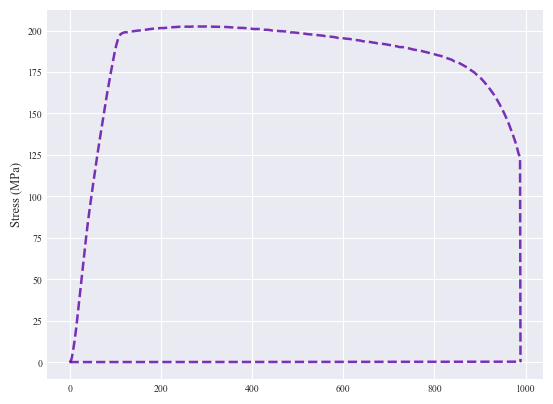

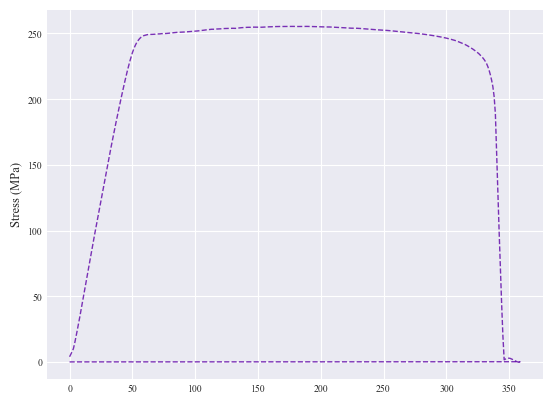

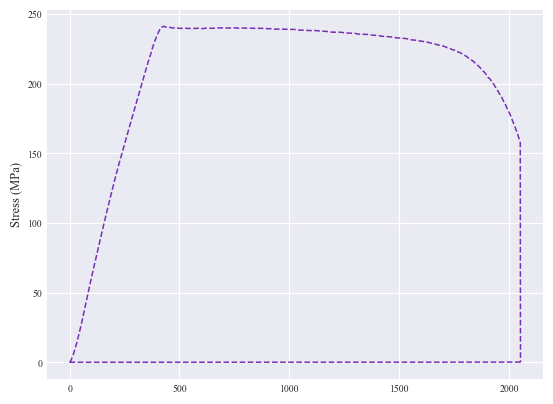

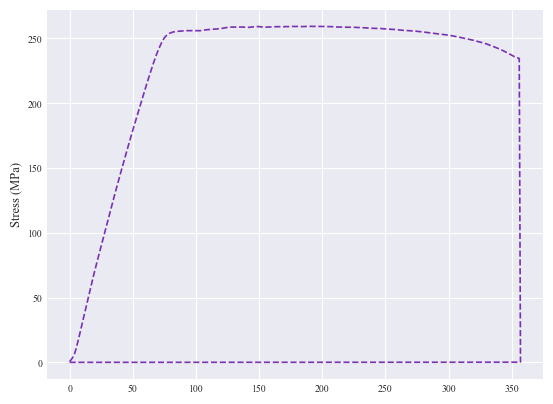

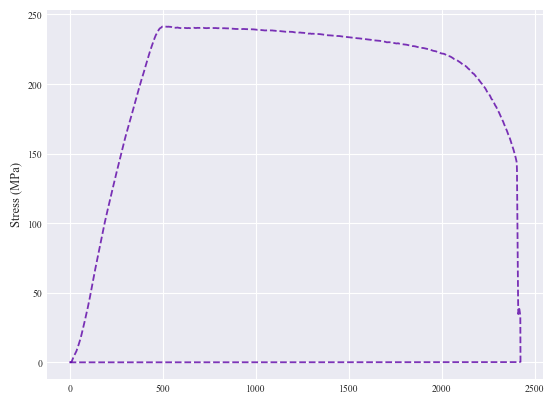

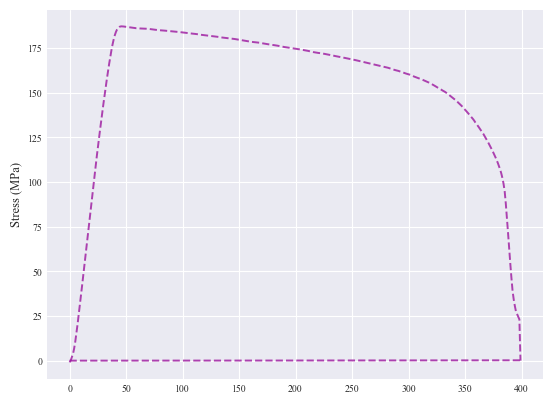

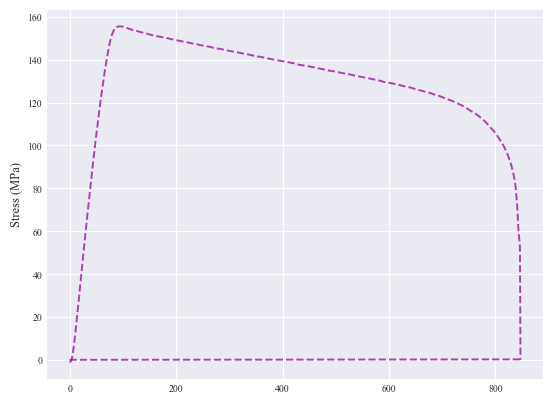

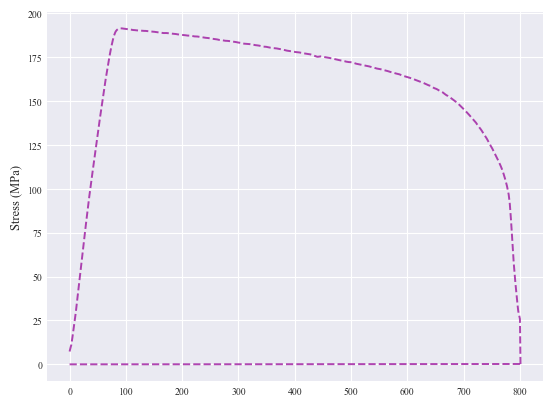

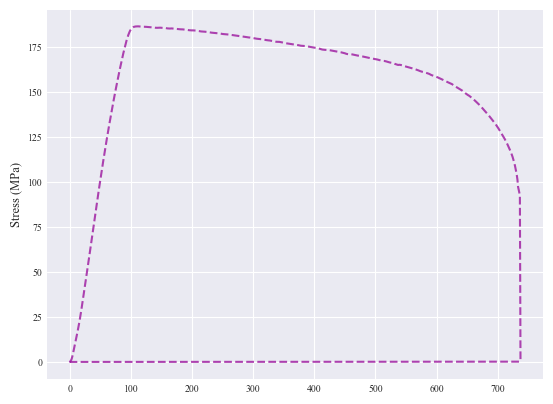

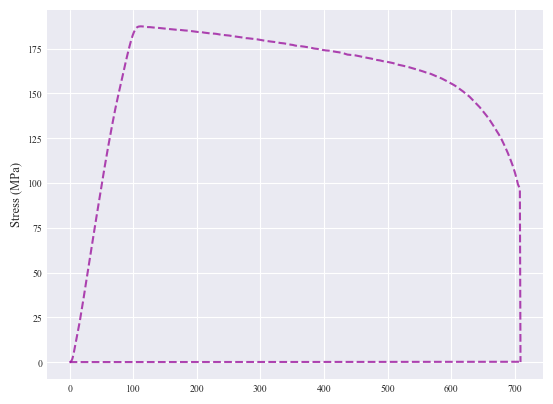

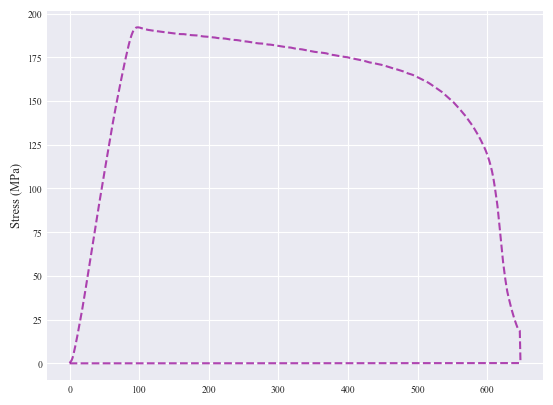

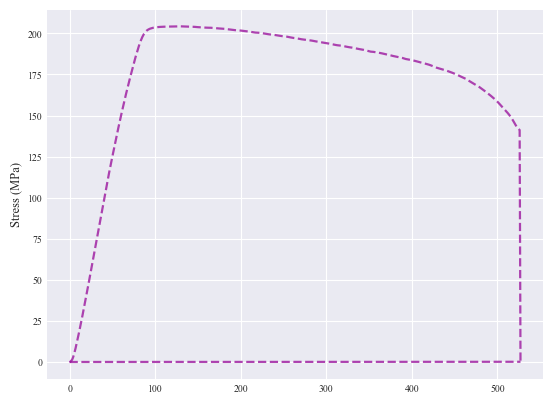

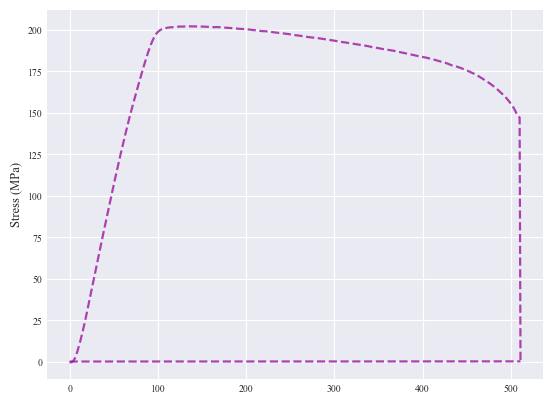

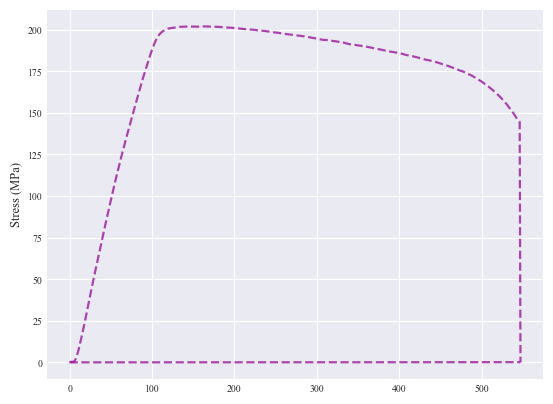

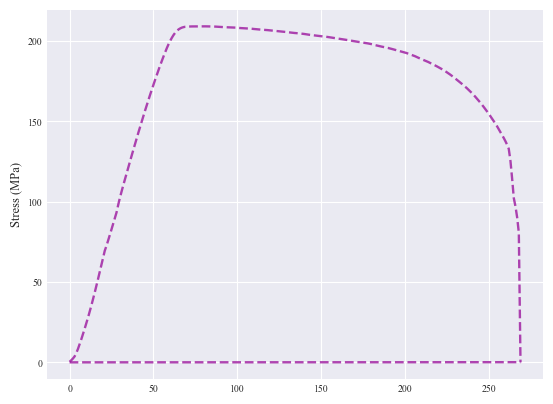

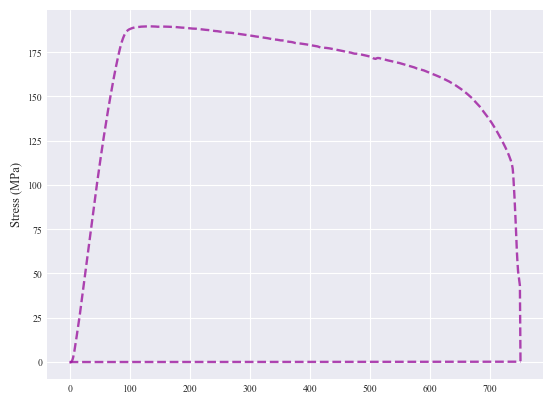

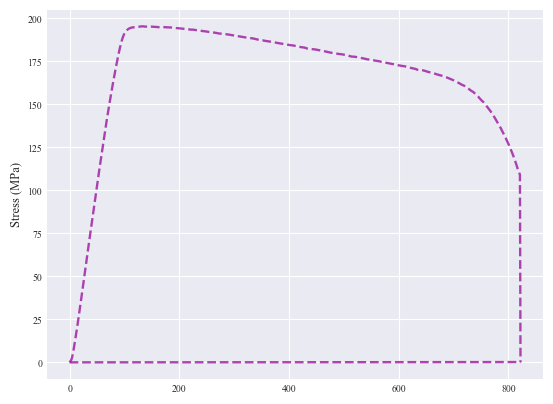

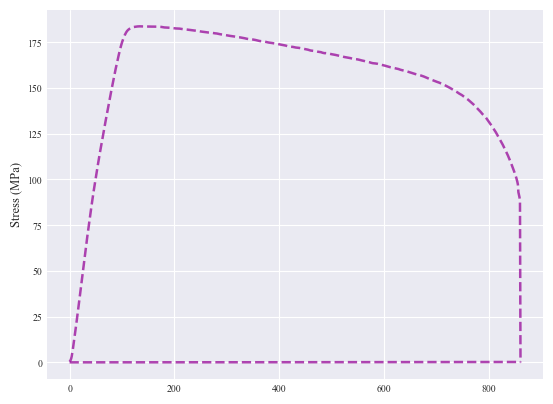

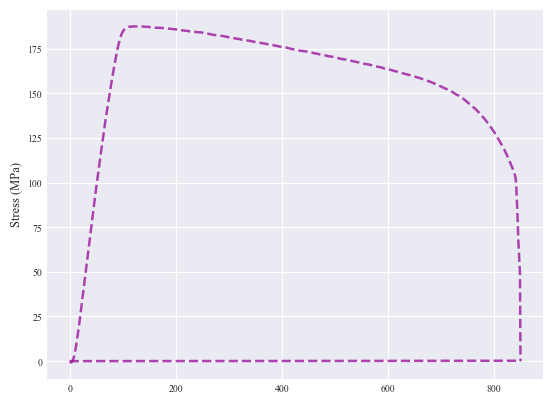

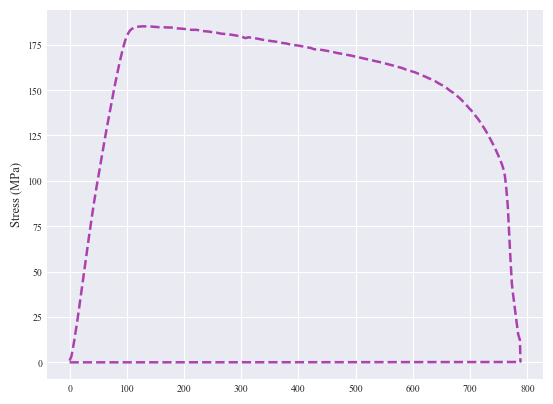

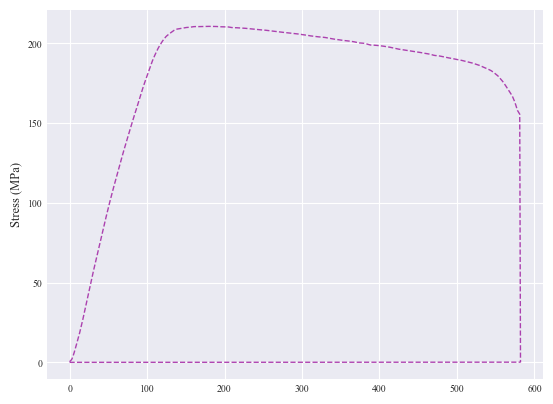

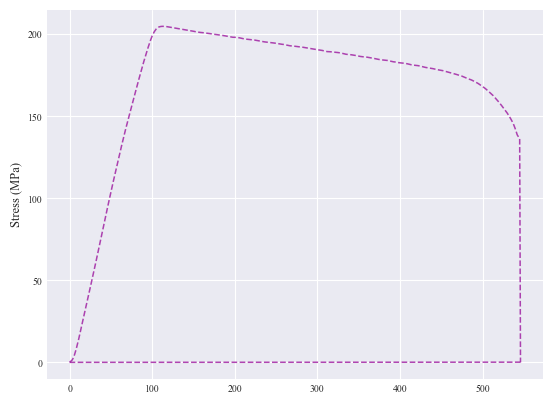

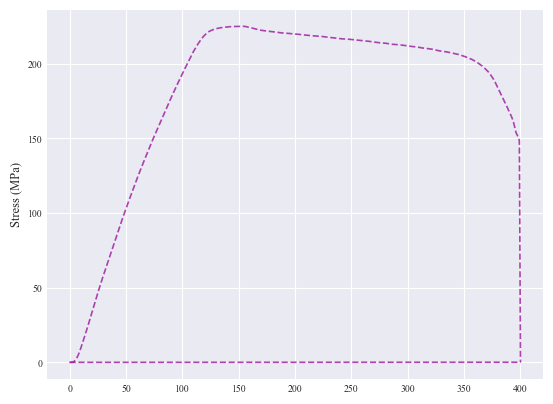

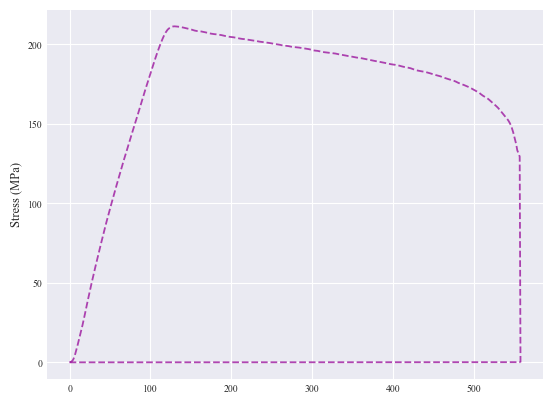

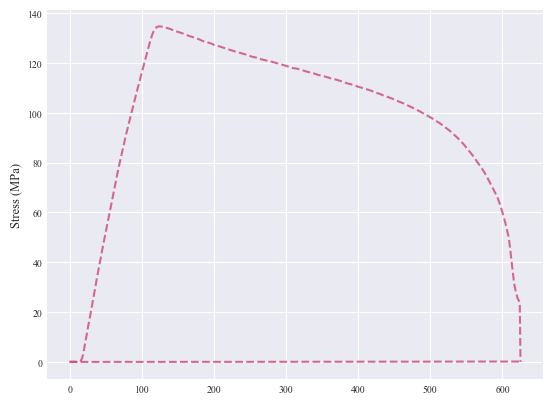

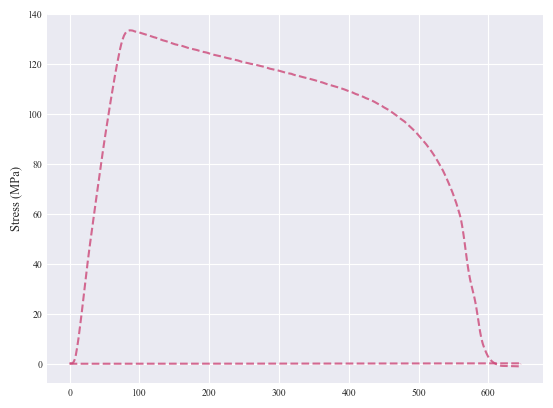

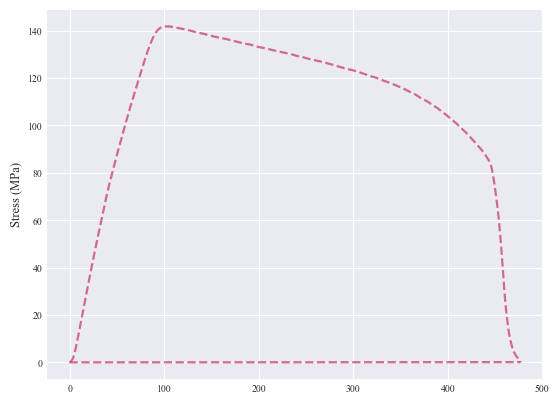

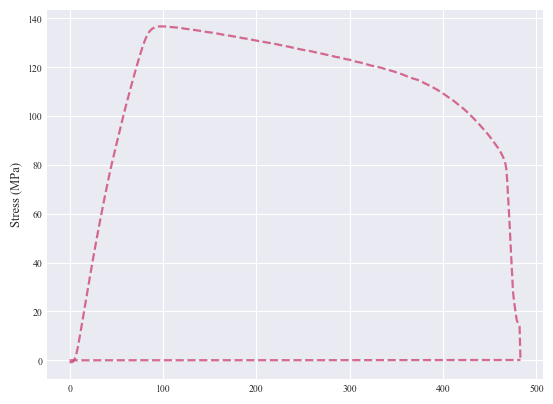

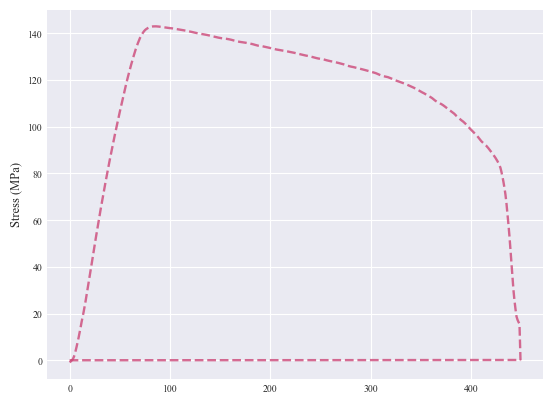

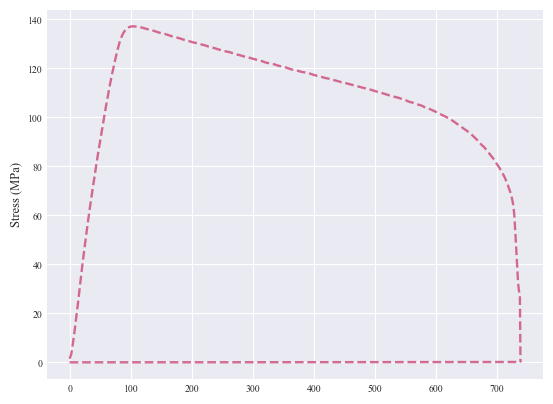

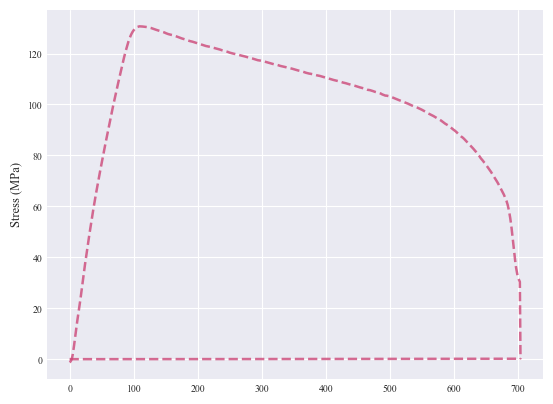

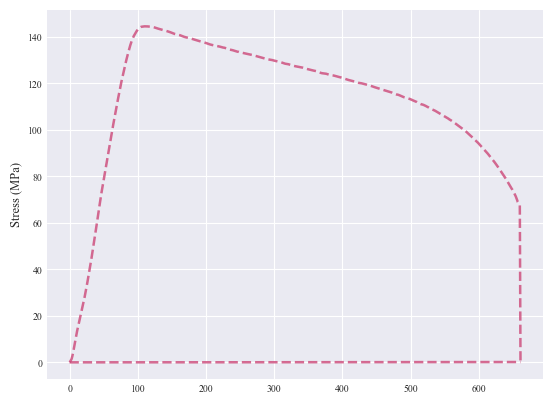

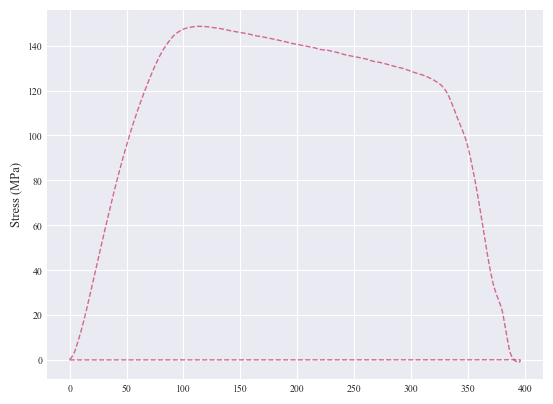

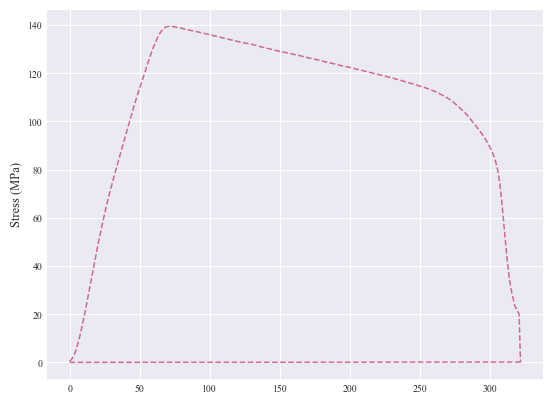

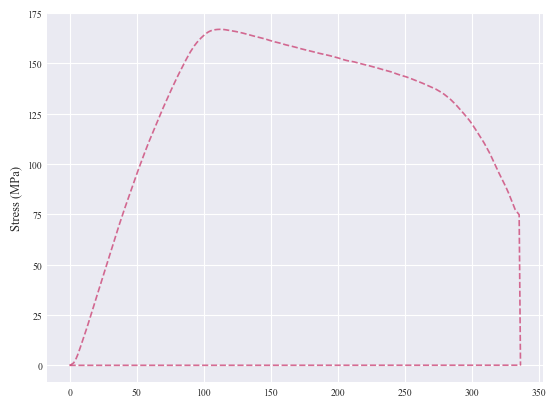

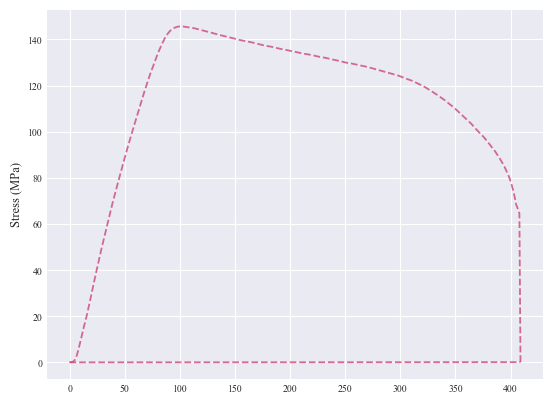

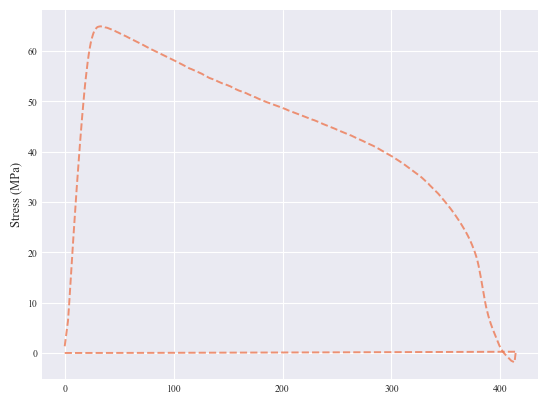

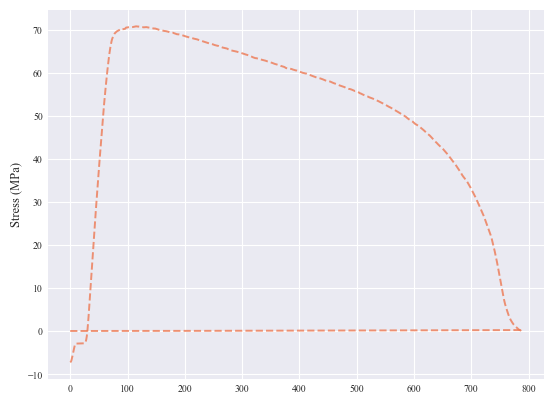

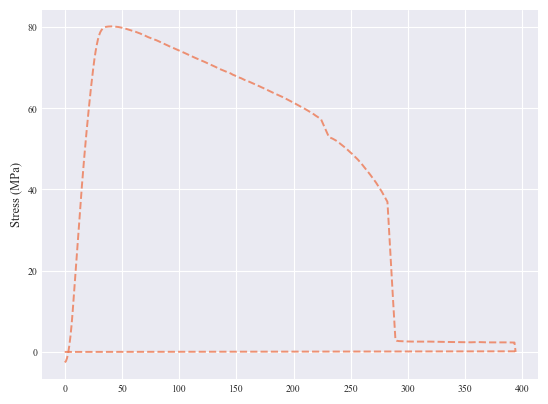

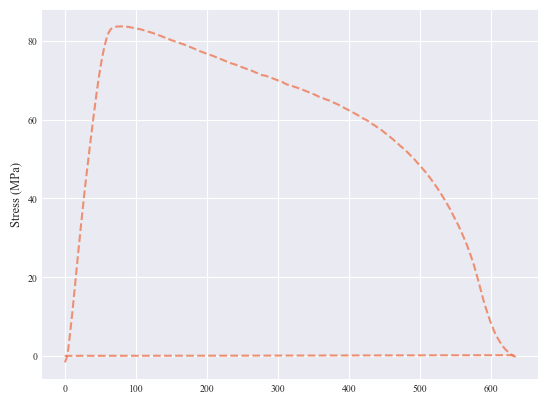

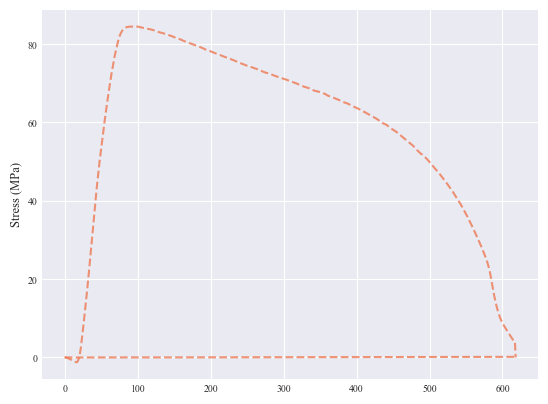

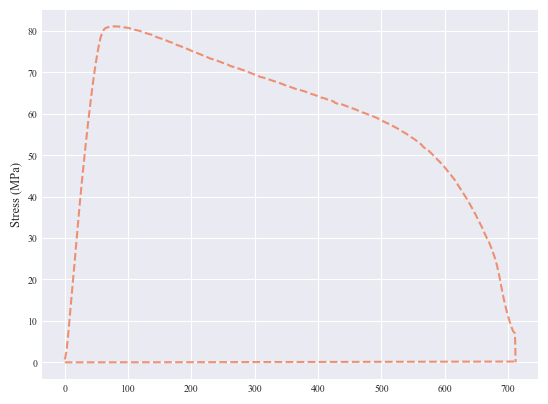

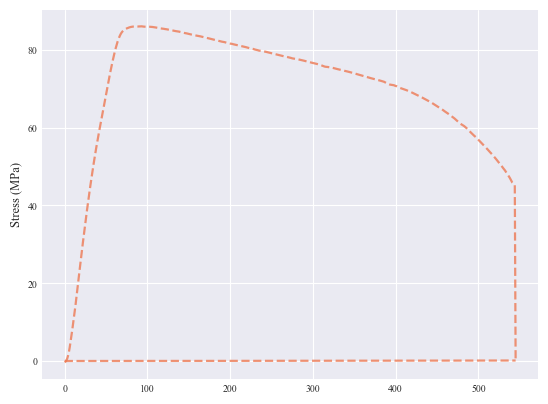

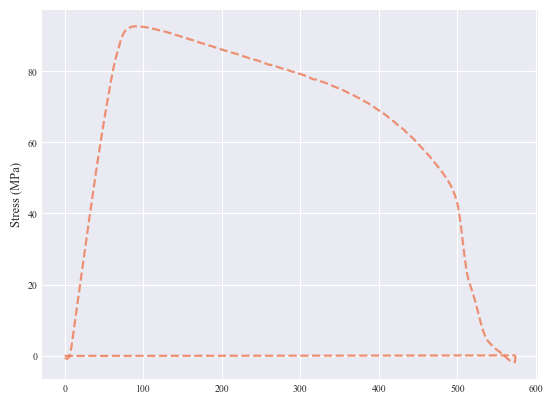

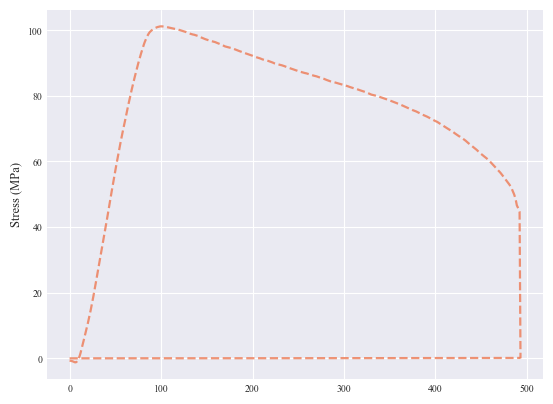

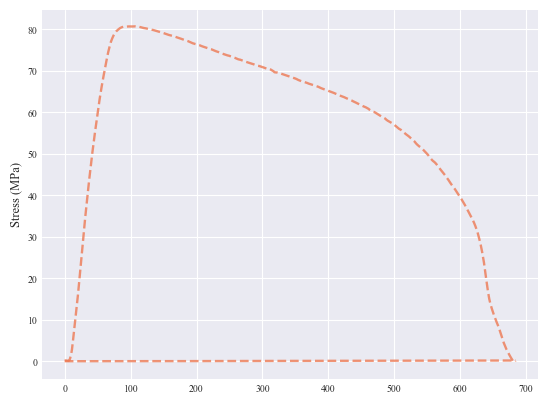

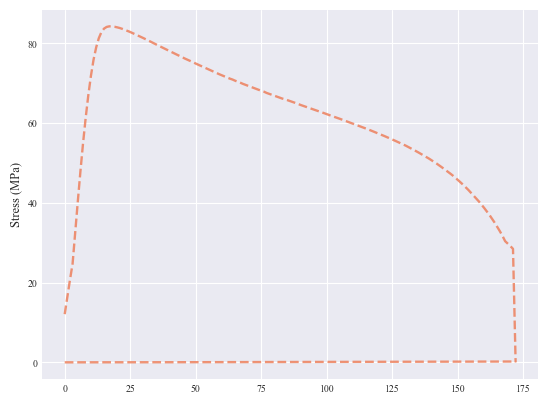

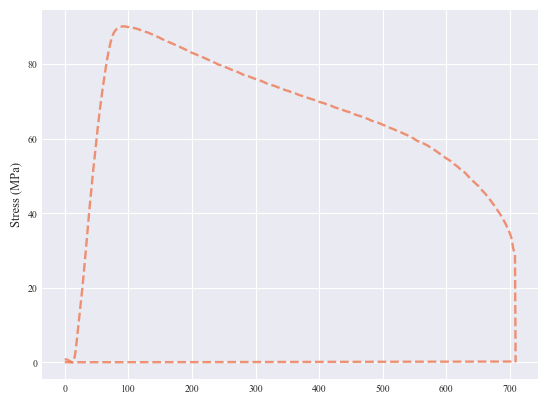

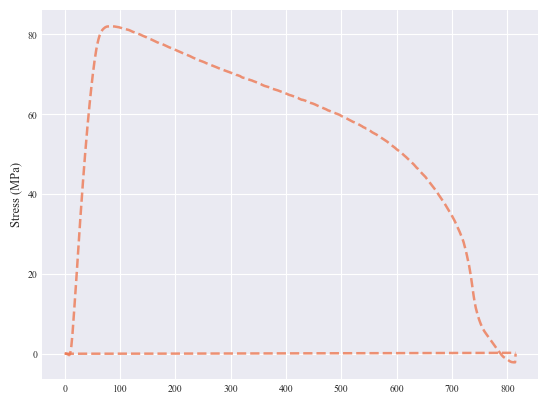

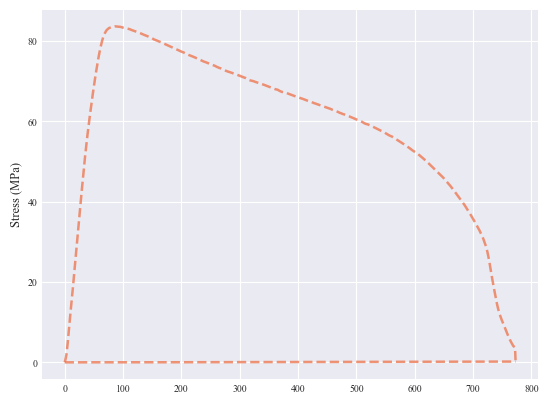

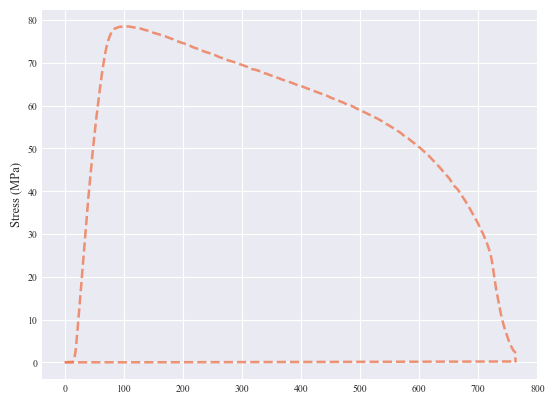

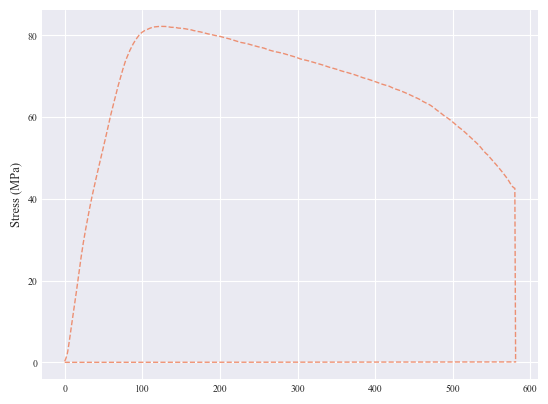

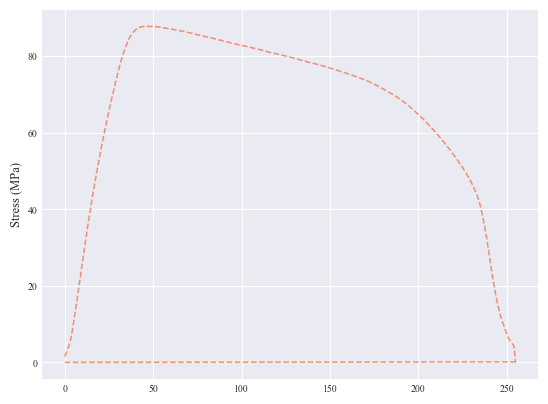

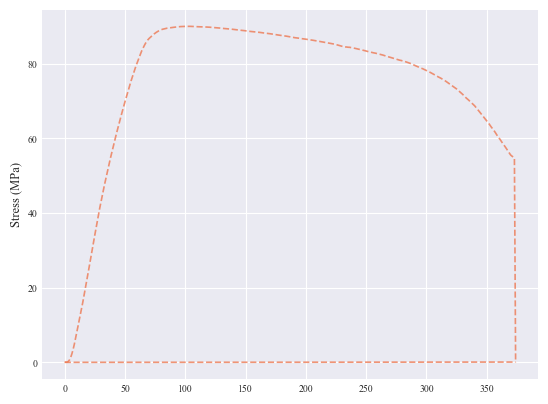

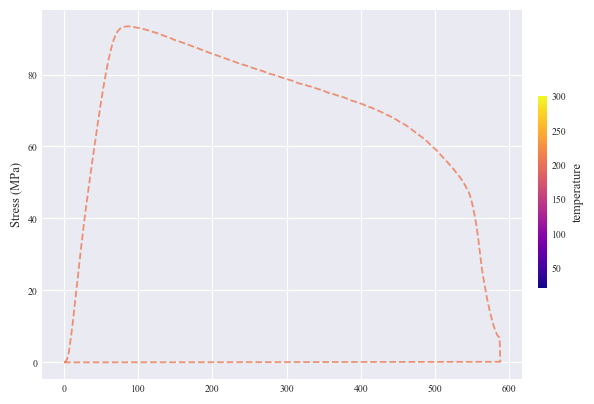

In [9]:
raw_dataset.plot(colorby='temperature', styleby='test type', x='Strain', y='Stress_MPa', ylabel='Stress (MPa)', legend=False, cbar=True, widthby='material', alpha=0.8, grid=True)

Alternatively, we might want to split the data into subplots.

In [10]:
raw_dataset.subplots(2,2,colsby='material',col_keys=['A,B,'])

TypeError: DataSet.subplots() missing 5 required positional arguments: 'nrows', 'ncols', 'cols_by', 'rows_by', and 'row_keys'